# SOM

In [1]:
from numbasom import *

In [2]:
import numpy as np
data = np.random.random([200,3])

In [3]:
som = SOM(som_size=(50,50), is_torus=False)

In [4]:
lattice = som.train(data, num_iterations=15000)

SOM training took: 1.952066 seconds.


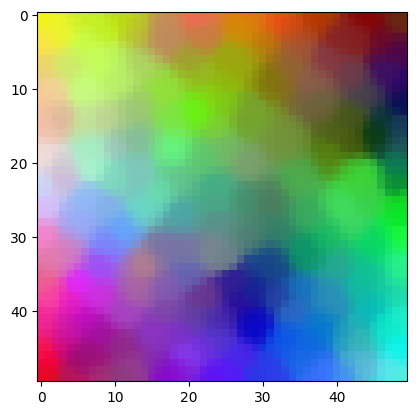

In [6]:
import matplotlib.pyplot as plt

plt.imshow(lattice)
plt.show()

In [7]:
um = u_matrix(lattice)

In [8]:
um.shape

(50, 50)

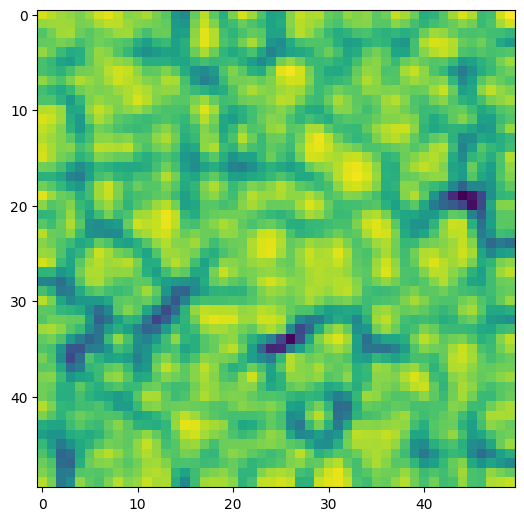

In [9]:
plot_u_matrix(um, fig_size=(6.2,6.2))

In [10]:
colors = np.array([[1.,0.,0.],[0.,1.,0.],[0.,0.,1.],[1.,1.,0.],[0.,1.,1.],[1.,0.,1.],[0.,0.,0.],[1.,1.,1.]])
color_labels = ['red', 'green', 'blue', 'yellow', 'cyan', 'purple','black', 'white']

In [11]:
projection = project_on_lattice(colors, lattice, additional_list=color_labels)

for p in projection:
    if projection[p]:
        print (p, projection[p][0])

Projecting on SOM took: 0.346581 seconds.
(0, 0) yellow
(16, 45) black
(19, 0) white
(27, 49) green
(37, 5) purple
(44, 29) blue
(45, 49) cyan
(49, 0) red


In [12]:
closest = lattice_closest_vectors(colors, lattice, additional_list=color_labels)

Finding closest data points took: 0.127542 seconds.


In [13]:
closest[(1,1)]

['yellow']

In [14]:
closest_vec = lattice_closest_vectors(colors, lattice)

Finding closest data points took: 0.003187 seconds.


In [17]:
values = np.array(list(closest_vec.values())).reshape(50,50,-1)
values

array([[[1., 1., 0.],
        [1., 1., 0.],
        [1., 1., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[1., 1., 0.],
        [1., 1., 0.],
        [1., 1., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[1., 1., 0.],
        [1., 1., 0.],
        [1., 1., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 1., 1.],
        [0., 1., 1.],
        [0., 1., 1.]],

       [[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 1., 1.],
        [0., 1., 1.],
        [0., 1., 1.]],

       [[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 1., 1.],
        [0., 1., 1.],
        [0., 1., 1.]]])

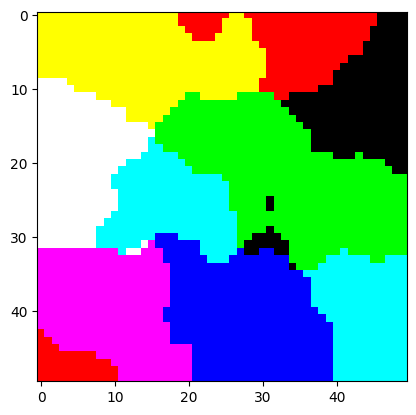

In [18]:
plt.imshow(values)
plt.show()

In [19]:
activations = lattice_activations(colors, lattice)

Computing SOM activations took: 0.374525 seconds.


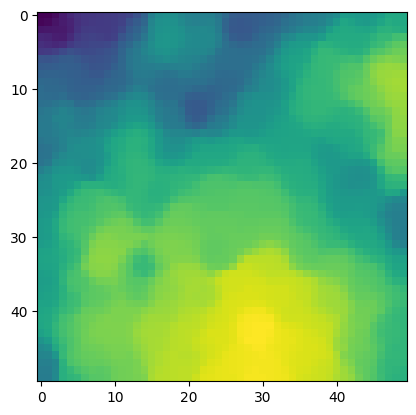

In [20]:
plt.imshow(activations[2])
plt.show()

In [21]:
activations = lattice_activations(colors, lattice, exponent=8)

Computing SOM activations took: 0.001178 seconds.


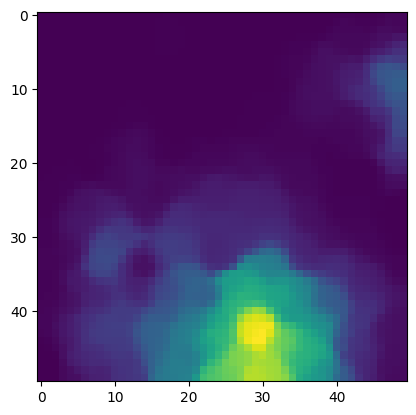

In [22]:
plt.imshow(activations[2])
plt.show()

# KMeans

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
import random
import folium as fl
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import os
from PIL import Image, ImageDraw, ImageFilter

In [4]:
## Load data
path = '/Users/davidschildberger/code/dadavie/planetary_garden/raw_data/'

In [18]:
filen = 'clim_hist_soil_overall.npy'
ov_data = np.load(path+filen, allow_pickle=True)
ov_data.shape

(121, 67420, 82)

## Train / Model - one year

In [4]:
dd = pd.DataFrame(ov_data[120])
dd.head()

0   1    2                    3                  4                    5   \
0  120  12  284   -18.84000015258789  7.619999885559082  0.18000000715255737   
1  120  12  285  -18.809999465942383  7.619999885559082  0.18000000715255737   
2  120  12  286  -19.399999618530273  8.029999732971191   0.1899999976158142   
3  120  12  287   -19.06999969482422  8.020000457763672   0.1899999976158142   
4  120  12  288   -19.81999969482422  8.010000228881836  0.18000000715255737   

                   6                  7                    8   \
0  12.640000343322754  5.900000095367432  -37.099998474121094   
1  12.649999618530273  5.900000095367432  -36.900001525878906   
2  13.079999923706055  5.599999904632568   -37.79999923706055   
3  13.069999694824219  5.800000190734863  -37.400001525878906   
4  13.149999618530273  5.300000190734863  -38.099998474121094   

                   9   ...                   12                   13  \
0   42.29999923706055  ...   -4.170000076293945  -31.670000076293945   
1   42.29999923706055  ...   -4.070000171661377  -31.600000381469727   
2                43.0  ...  -3.8299999237060547   -32.70000076293945   
3  42.900001525878906  ...                 -3.5   -32.33000183105469   
4  43.400001525878906  ...   -4.130000114440918  -33.099998474121094   

                   14                   15                   16  \
0                10.0                  6.0                  0.0   
1                10.0                  6.0                  0.0   
2  1.2000000476837158  0.10000000149011612  0.10000000149011612   
3  1.2000000476837158  0.10000000149011612  0.10000000149011612   
4  1.2000000476837158  0.10000000149011612  0.10000000149011612   

                   17                   18                   19  \
0  222.05999755859375                 10.0                  0.0   
1  222.05999755859375                 10.0                  0.0   
2                 0.0  0.30000001192092896  0.30000001192092896   
3                 0.0  0.30000001192092896  0.30000001192092896   
4                 0.0  0.30000001192092896  0.30000001192092896   

                    20                   21  
0                 10.0                  0.0  
1                 10.0                  0.0  
2  0.30000001192092896  0.30000001192092896  
3  0.30000001192092896  0.30000001192092896  
4  0.30000001192092896  0.30000001192092896  

[5 rows x 22 columns]

In [5]:
dd = dd.astype(float)
dd.dropna(inplace=True)
dd.reset_index(inplace=True, drop=True)
sel_data = dd.iloc[:,3:]

In [276]:
# Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sel_data)
# Initialize K-Means
num_clusters = 100
kmeans = KMeans(
    init="random",
    n_clusters=num_clusters,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [277]:
%%time
kmeans.fit(scaled_data)

CPU times: user 53.7 s, sys: 1.72 s, total: 55.4 s
Wall time: 3.65 s


KMeans(init='random', n_clusters=100, random_state=42)

In [278]:
dd['Cluster_No'] = kmeans.labels_

In [279]:
sel_data.head()

3         4         5          6          7          8    9    10  \
0 -20.191668  7.716667  0.182427  42.299999 -39.100002  12.749866  3.6  0.0   
1 -20.174999  7.708333  0.182230  42.299999 -39.200001  12.782353  3.6  0.0   
2 -20.766668  8.125000  0.188953  43.000000 -40.700001  13.210182  3.3  0.3   
3 -20.483334  8.116666  0.189200  42.900002 -40.400002  13.226416  3.6  0.3   
4 -21.241667  8.108334  0.186828  43.400002 -41.299999  13.338007  3.0  0.3   

     11   12          13         14        15    16   17    18   19        20  \
0  10.0  0.0  222.056488 -33.766666 -6.100000  10.0  6.0  10.0  0.0 -6.100000   
1  10.0  0.0  222.056488 -33.733334 -5.966667  10.0  6.0  10.0  0.0 -5.966667   
2   0.3  0.1    0.000016 -34.799999 -5.733334   1.2  0.1   0.3  0.3 -5.733334   
3   0.3  0.1    0.000016 -34.500000 -5.400000   1.2  0.1   0.3  0.3 -5.400000   
4   0.3  0.1    0.000016 -35.333332 -6.000000   1.2  0.1   0.3  0.3 -6.000000   

          21  
0 -33.766666  
1 -33.733334  
2 -34.799999  
3 -34.500000  
4 -35.333332

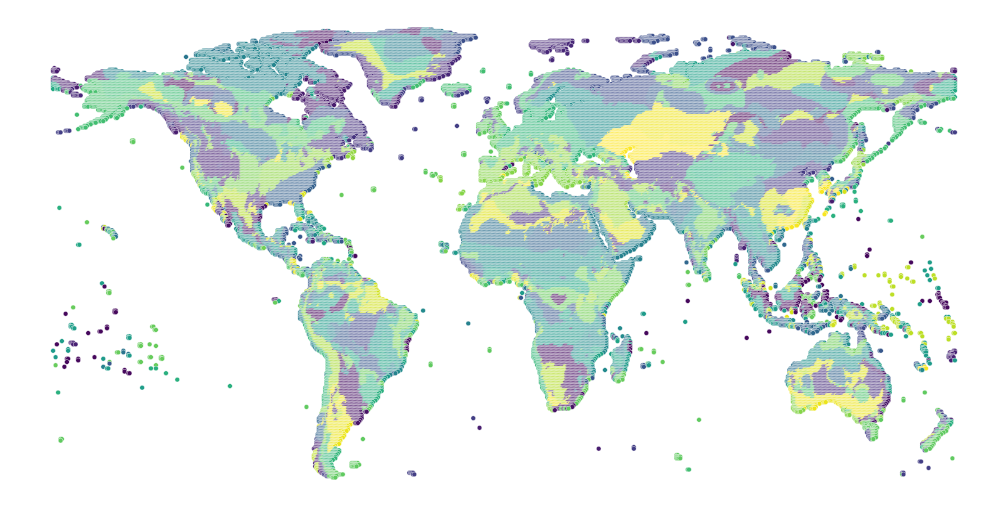

In [280]:
plt.figure(figsize=(16, 8), dpi=80)
g = seaborn.scatterplot(data=dd,  x=2, y=1, hue='Cluster_No', legend=False, palette="viridis", size=0.01)
g.invert_yaxis()

# Hide the right and top spines
g.spines.right.set_visible(False)
g.spines.top.set_visible(False)
g.spines.left.set_visible(False)
g.spines.bottom.set_visible(False)
g.set(xlabel=None)
g.set(ylabel=None)
g.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.show()

### Project

In [262]:
filename = 'data_inkl_bioclim_grs.csv'
df = pd.read_csv(path+filename)

In [263]:
samples = df.sample(n = 5)

In [264]:
samples

Unnamed: 0   index      gbifID                            datasetKey  \
73873        74684   75712  1259064780  7bd65a7a-f762-11e1-a439-00145eb45e9a   
224307      229871  233158  2515716123  15f819bd-6612-4447-854b-14d12ee1022d   
228170      233763  237080  1259062958  7bd65a7a-f762-11e1-a439-00145eb45e9a   
189844      194377  197188   686824512  dce00a1f-f6b4-4e11-9771-92c62c40ad80   
10359        10503   10665  2513355231  15f819bd-6612-4447-854b-14d12ee1022d   

         kingdom        phylum          class        order            family  \
73873    Plantae  Tracheophyta     Liliopsida  Alismatales           Araceae   
224307   Plantae  Tracheophyta  Magnoliopsida   Santalales      Loranthaceae   
228170   Plantae  Tracheophyta  Magnoliopsida     Lamiales  Scrophulariaceae   
189844  Animalia      Chordata       Amphibia        Anura   Leptodactylidae   
10359    Plantae  Tracheophyta  Magnoliopsida      Apiales        Araliaceae   

                genus  ...    b10         b11        b12        b13  \
73873       Anthurium  ...    8.1  107.164299  21.233335  24.866669   
224307  Lepeostegeres  ...  228.5   26.354450  26.200003  27.533333   
228170       Buddleja  ...    2.7   94.442520   8.900001  13.500000   
189844    Engystomops  ...   14.0   56.585278  15.333333  15.333333   
10359          Aralia  ...   30.5   77.447578  26.100000  26.100000   

                b14         b15         b16         b17        b18        b19  
73873    786.600037  241.900009   96.700005  128.199997  23.233332  22.566668  
224307  3662.599854  335.500000  873.500000  907.100037  26.200003  27.533333  
228170   492.700012  123.599998  133.100006   55.100002  13.300000   9.433333  
189844  1482.400024  189.800003  206.300003  387.500000  15.366668  15.566667  
10359   2320.499756  482.899994  618.400024  119.900002  25.666666  26.100000  

[5 rows x 38 columns]

In [265]:
sel_pred_sc = scaler.transform(samples.iloc[:, 19:].values)
kmeans.predict(sel_pred_sc)

array([5, 8, 0, 5, 3], dtype=int32)

## Train / Model - history

In [19]:
ov_data.shape

(121, 67420, 82)

In [20]:
ov_data_fl = ov_data.reshape(-1, ov_data.shape[-1])

In [21]:
ov_data_fl.shape

(8157820, 82)

In [22]:
dd = pd.DataFrame(ov_data_fl)
dd.head()

0   1    2                    3                  4                    5   \
0  0  12  284  -20.191667556762695  7.716667175292969  0.18000000715255737   
1  0  12  285  -20.174999237060547  7.708333492279053  0.18000000715255737   
2  0  12  286   -20.76666831970215              8.125   0.1899999976158142   
3  0  12  287  -20.483333587646484  8.116665840148926   0.1899999976158142   
4  0  12  288  -21.241666793823242  8.108333587646484   0.1899999976158142   

                   6                   7                    8   \
0               12.75  3.5999999046325684  -39.099998474121094   
1  12.779999732971191  3.5999999046325684   -39.20000076293945   
2  13.210000038146973   3.299999952316284   -40.70000076293945   
3  13.229999542236328  3.5999999046325684  -40.400001525878906   
4   13.34000015258789                 3.0   -41.29999923706055   

                   9   ...   72   73   74   75   76   77   78   79   80   81  
0   42.29999923706055  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1   42.29999923706055  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2                43.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  42.900001525878906  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  43.400001525878906  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 82 columns]

In [23]:
dd = dd.astype(float)
dd.dropna(inplace=True)
dd.reset_index(inplace=True, drop=True)
sel_data = dd.iloc[:,3:]

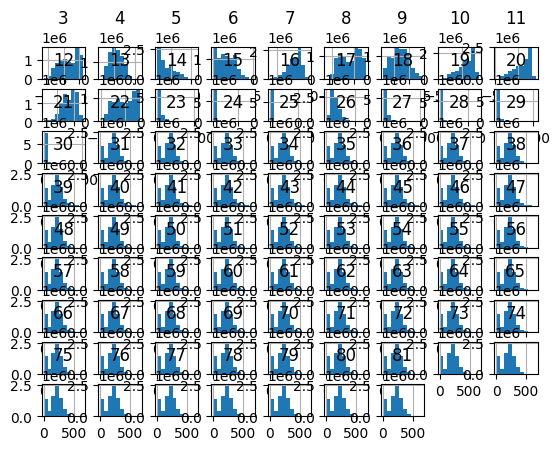

In [11]:
sel_data.hist();

In [37]:
# Scaling
scaler = RobustScaler()
scaler.fit(sel_data)
scaled_data = scaler.transform(sel_data)
# Initialize K-Means
num_clusters = 500
kmeans = MiniBatchKMeans(
    init="k-means++",
    n_clusters=num_clusters,
    n_init=10,
    random_state=42, 
    verbose=1
)

In [38]:
%%time
kmeans.fit(scaled_data)

Init 1/10 with method k-means++
Inertia for init 1/10: 7609.002729190198
Init 2/10 with method k-means++
Inertia for init 2/10: 7733.760564718438
Init 3/10 with method k-means++
Inertia for init 3/10: 8024.105339705215
Init 4/10 with method k-means++
Inertia for init 4/10: 7810.6426246074225
Init 5/10 with method k-means++
Inertia for init 5/10: 7561.22705625233
Init 6/10 with method k-means++
Inertia for init 6/10: 7745.546763199985
Init 7/10 with method k-means++
Inertia for init 7/10: 7675.275141697679
Init 8/10 with method k-means++
Inertia for init 8/10: 7704.160075813708
Init 9/10 with method k-means++
Inertia for init 9/10: 7924.519592568142
Init 10/10 with method k-means++
Inertia for init 10/10: 7735.202094724599
[MiniBatchKMeans] Reassigning 165 cluster centers.
Minibatch step 1/796593: mean batch inertia: 2.666852639702131
Minibatch step 2/796593: mean batch inertia: 2.936734742045809, ewa inertia: 2.936734742045809
Minibatch step 3/796593: mean batch inertia: 2.396799797476

Minibatch step 90/796593: mean batch inertia: 2.3761494665247236, ewa inertia: 2.9203054692045742
Minibatch step 91/796593: mean batch inertia: 1.9875568411549942, ewa inertia: 2.9200712850209785
Minibatch step 92/796593: mean batch inertia: 2.1194542377467744, ewa inertia: 2.919870274969663
Minibatch step 93/796593: mean batch inertia: 2.1235122929307204, ewa inertia: 2.919670334237224
Minibatch step 94/796593: mean batch inertia: 2.1394390729728285, ewa inertia: 2.9194744424230303
Minibatch step 95/796593: mean batch inertia: 2.2291292756285124, ewa inertia: 2.919301118212816
Minibatch step 96/796593: mean batch inertia: 2.0897982642153394, ewa inertia: 2.919092855833422
Minibatch step 97/796593: mean batch inertia: 1.9411596043322934, ewa inertia: 2.9188473271955586
Minibatch step 98/796593: mean batch inertia: 1.9414443742618144, ewa inertia: 2.91860193169918
Minibatch step 99/796593: mean batch inertia: 2.1462513309894384, ewa inertia: 2.9184080184738606
Minibatch step 100/796593:

Minibatch step 179/796593: mean batch inertia: 2.0715513968653934, ewa inertia: 2.9008260769560774
Minibatch step 180/796593: mean batch inertia: 1.9754611597996479, ewa inertia: 2.9005937465927447
Minibatch step 181/796593: mean batch inertia: 1.9609902758663533, ewa inertia: 2.900357841371253
Minibatch step 182/796593: mean batch inertia: 2.10100254648656, ewa inertia: 2.9001571481067376
Minibatch step 183/796593: mean batch inertia: 1.8795381068429928, ewa inertia: 2.899900902394063
Minibatch step 184/796593: mean batch inertia: 2.2064507754355933, ewa inertia: 2.8997267986248776
Minibatch step 185/796593: mean batch inertia: 1.9841895803435359, ewa inertia: 2.8994969356912135
Minibatch step 186/796593: mean batch inertia: 2.5653232012956377, ewa inertia: 2.8994130350551632
Minibatch step 187/796593: mean batch inertia: 1.8555995041164357, ewa inertia: 2.899150965927192
Minibatch step 188/796593: mean batch inertia: 1.8892878815152454, ewa inertia: 2.8988974207009064
Minibatch step 

Minibatch step 273/796593: mean batch inertia: 1.9276294568111059, ewa inertia: 2.8800262255178386
Minibatch step 274/796593: mean batch inertia: 2.0238890017123228, ewa inertia: 2.8798112760761847
Minibatch step 275/796593: mean batch inertia: 2.1244932116208597, ewa inertia: 2.8796216391912184
Minibatch step 276/796593: mean batch inertia: 2.1340703053253725, ewa inertia: 2.879434454428679
Minibatch step 277/796593: mean batch inertia: 2.0513065351840916, ewa inertia: 2.8792265372526584
Minibatch step 278/796593: mean batch inertia: 2.075757035957438, ewa inertia: 2.8790248110388137
Minibatch step 279/796593: mean batch inertia: 2.017105502829784, ewa inertia: 2.878808409895517
Minibatch step 280/796593: mean batch inertia: 2.0407282026106763, ewa inertia: 2.878597994009362
Minibatch step 281/796593: mean batch inertia: 2.048305247143502, ewa inertia: 2.8783895333124248
Minibatch step 282/796593: mean batch inertia: 2.073783035159824, ewa inertia: 2.878187521634016
Minibatch step 283

Minibatch step 366/796593: mean batch inertia: 1.9910708886574198, ewa inertia: 2.8603780524496316
Minibatch step 367/796593: mean batch inertia: 1.8747109476628296, ewa inertia: 2.8601305820816347
Minibatch step 368/796593: mean batch inertia: 1.9811170243980787, ewa inertia: 2.859909889103714
Minibatch step 369/796593: mean batch inertia: 1.9006987914530984, ewa inertia: 2.8596690610166555
Minibatch step 370/796593: mean batch inertia: 1.7543825018979544, ewa inertia: 2.8593915579223568
Minibatch step 371/796593: mean batch inertia: 1.8681013007927327, ewa inertia: 2.859142675755617
Minibatch step 372/796593: mean batch inertia: 1.8718841376902047, ewa inertia: 2.858894805828198
Minibatch step 373/796593: mean batch inertia: 2.0086347832016003, ewa inertia: 2.858681331969052
Minibatch step 374/796593: mean batch inertia: 1.993793418176934, ewa inertia: 2.8584641855011803
Minibatch step 375/796593: mean batch inertia: 2.1856479140772627, ewa inertia: 2.8582952622516626
Minibatch step 

Minibatch step 458/796593: mean batch inertia: 1.7619503028059924, ewa inertia: 2.8403987807614013
Minibatch step 459/796593: mean batch inertia: 2.0257598057523296, ewa inertia: 2.8401942502399393
Minibatch step 460/796593: mean batch inertia: 1.9444649434803494, ewa inertia: 2.839969360457078
Minibatch step 461/796593: mean batch inertia: 2.0225580187302965, ewa inertia: 2.8397641338805193
Minibatch step 462/796593: mean batch inertia: 1.7813640018477248, ewa inertia: 2.839498402510476
Minibatch step 463/796593: mean batch inertia: 2.0520936453956606, ewa inertia: 2.839300709654481
Minibatch step 464/796593: mean batch inertia: 1.909092085900418, ewa inertia: 2.8390671631870017
Minibatch step 465/796593: mean batch inertia: 1.9389133754925525, ewa inertia: 2.838841162554524
Minibatch step 466/796593: mean batch inertia: 2.0070588412021353, ewa inertia: 2.8386323278717405
Minibatch step 467/796593: mean batch inertia: 2.198173449240921, ewa inertia: 2.8384715285576396
Minibatch step 4

Minibatch step 550/796593: mean batch inertia: 1.9406236762782647, ewa inertia: 2.820543778059325
Minibatch step 551/796593: mean batch inertia: 1.960849470044509, ewa inertia: 2.8203279355444075
Minibatch step 552/796593: mean batch inertia: 1.849631614730447, ewa inertia: 2.8200842238748605
Minibatch step 553/796593: mean batch inertia: 2.1354509983041745, ewa inertia: 2.819912333755517
Minibatch step 554/796593: mean batch inertia: 1.9787666058879094, ewa inertia: 2.8197011482124434
Minibatch step 555/796593: mean batch inertia: 1.980014555404524, ewa inertia: 2.8194903290128224
Minibatch step 556/796593: mean batch inertia: 2.050226693540713, ewa inertia: 2.8192971908285083
Minibatch step 557/796593: mean batch inertia: 2.1401390722117246, ewa inertia: 2.819126675338313
Minibatch step 558/796593: mean batch inertia: 1.8923317713263204, ewa inertia: 2.818893985949736
Minibatch step 559/796593: mean batch inertia: 2.061512901333619, ewa inertia: 2.818703831104542
Minibatch step 560/7

Minibatch step 643/796593: mean batch inertia: 1.9840314564347934, ewa inertia: 2.8022683834796793
Minibatch step 644/796593: mean batch inertia: 1.950482256486367, ewa inertia: 2.8020545264631695
Minibatch step 645/796593: mean batch inertia: 1.8148134255337447, ewa inertia: 2.8018066609136736
Minibatch step 646/796593: mean batch inertia: 2.300624465401865, ewa inertia: 2.8016808296449276
Minibatch step 647/796593: mean batch inertia: 2.04033561039404, ewa inertia: 2.8014896795287623
Minibatch step 648/796593: mean batch inertia: 2.35109041556135, ewa inertia: 2.801376598275408
Minibatch step 649/796593: mean batch inertia: 1.783592234900068, ewa inertia: 2.801121064262228
Minibatch step 650/796593: mean batch inertia: 1.9294150212748238, ewa inertia: 2.8009022059740745
Minibatch step 651/796593: mean batch inertia: 2.0869181992049386, ewa inertia: 2.800722946786017
Minibatch step 652/796593: mean batch inertia: 1.9435842468788336, ewa inertia: 2.8005077459048473
Minibatch step 653/7

Minibatch step 732/796593: mean batch inertia: 1.881405643320355, ewa inertia: 2.7843012455423297
Minibatch step 733/796593: mean batch inertia: 1.861048379251347, ewa inertia: 2.7840694454493113
Minibatch step 734/796593: mean batch inertia: 1.7751368010465718, ewa inertia: 2.7838161338275866
Minibatch step 735/796593: mean batch inertia: 1.9473210075388718, ewa inertia: 2.7836061159059935
Minibatch step 736/796593: mean batch inertia: 2.10154292737788, ewa inertia: 2.783434871043055
Minibatch step 737/796593: mean batch inertia: 2.0305732699575407, ewa inertia: 2.7832458508996756
Minibatch step 738/796593: mean batch inertia: 1.8542905614437613, ewa inertia: 2.7830126191054747
Minibatch step 739/796593: mean batch inertia: 1.9660348839987942, ewa inertia: 2.7828075013940587
Minibatch step 740/796593: mean batch inertia: 2.070102235152496, ewa inertia: 2.782628563257995
Minibatch step 741/796593: mean batch inertia: 1.802212305547377, ewa inertia: 2.7823824112144626
Minibatch step 742

Minibatch step 817/796593: mean batch inertia: 1.966652165410425, ewa inertia: 2.7674863971830095
Minibatch step 818/796593: mean batch inertia: 2.340235867174603, ewa inertia: 2.767379127857114
Minibatch step 819/796593: mean batch inertia: 1.976245658875938, ewa inertia: 2.767180498837486
Minibatch step 820/796593: mean batch inertia: 2.052955675996235, ewa inertia: 2.7670011791879996
Minibatch step 821/796593: mean batch inertia: 1.8632246178966017, ewa inertia: 2.766774268989695
Minibatch step 822/796593: mean batch inertia: 2.0464587877355713, ewa inertia: 2.7665934201652247
Minibatch step 823/796593: mean batch inertia: 1.7955639387850646, ewa inertia: 2.766349624849417
Minibatch step 824/796593: mean batch inertia: 1.9380550731254238, ewa inertia: 2.766141665837161
Minibatch step 825/796593: mean batch inertia: 1.8745962104917382, ewa inertia: 2.7659178264893236
Minibatch step 826/796593: mean batch inertia: 1.8637811578116916, ewa inertia: 2.765691328017074
Minibatch step 827/7

Minibatch step 901/796593: mean batch inertia: 1.7616649317463846, ewa inertia: 2.7511929533639385
Minibatch step 902/796593: mean batch inertia: 1.9554891512254975, ewa inertia: 2.750993176875735
Minibatch step 903/796593: mean batch inertia: 1.9477930930123968, ewa inertia: 2.7507915183042324
Minibatch step 904/796593: mean batch inertia: 2.042481214134293, ewa inertia: 2.7506136836065163
Minibatch step 905/796593: mean batch inertia: 2.0376159406533465, ewa inertia: 2.7504346720386423
Minibatch step 906/796593: mean batch inertia: 1.8850537611993576, ewa inertia: 2.750217401794538
Minibatch step 907/796593: mean batch inertia: 1.8038950763309258, ewa inertia: 2.7499798096774954
Minibatch step 908/796593: mean batch inertia: 1.9094602613044713, ewa inertia: 2.7497687813486267
Minibatch step 909/796593: mean batch inertia: 2.0658179372413463, ewa inertia: 2.749597062554055
Minibatch step 910/796593: mean batch inertia: 1.9904087554376024, ewa inertia: 2.7494064539714733
Minibatch step

Minibatch step 987/796593: mean batch inertia: 2.1086084047016564, ewa inertia: 2.7348560828777604
Minibatch step 988/796593: mean batch inertia: 2.0883480396945724, ewa inertia: 2.734693764806494
Minibatch step 989/796593: mean batch inertia: 2.041635671723586, ewa inertia: 2.734519759464827
Minibatch step 990/796593: mean batch inertia: 1.8984541176718932, ewa inertia: 2.7343098493734392
Minibatch step 991/796593: mean batch inertia: 1.816733146209635, ewa inertia: 2.734079474388524
Minibatch step 992/796593: mean batch inertia: 1.8167548159291, ewa inertia: 2.7338491626841983
Minibatch step 993/796593: mean batch inertia: 1.9053969470557566, ewa inertia: 2.7336411640874374
Minibatch step 994/796593: mean batch inertia: 2.128069990281227, ewa inertia: 2.7334891239914434
Minibatch step 995/796593: mean batch inertia: 2.1057986150915164, ewa inertia: 2.733331530418044
Minibatch step 996/796593: mean batch inertia: 1.8996365607285957, ewa inertia: 2.7331222155287227
Minibatch step 997/7

Minibatch step 1071/796593: mean batch inertia: 1.9855474210764594, ewa inertia: 2.719045139095775
Minibatch step 1072/796593: mean batch inertia: 1.908328277047537, ewa inertia: 2.718841593294948
Minibatch step 1073/796593: mean batch inertia: 1.9681684682317775, ewa inertia: 2.7186531226098634
Minibatch step 1074/796593: mean batch inertia: 1.900285210153742, ewa inertia: 2.718447655868132
Minibatch step 1075/796593: mean batch inertia: 1.7816595200401821, ewa inertia: 2.7182124574897117
Minibatch step 1076/796593: mean batch inertia: 1.8727419205722455, ewa inertia: 2.7180001861215337
Minibatch step 1077/796593: mean batch inertia: 2.267285069113976, ewa inertia: 2.7178870255673
Minibatch step 1078/796593: mean batch inertia: 2.0810017581190787, ewa inertia: 2.717727123475872
Minibatch step 1079/796593: mean batch inertia: 1.8798703730409871, ewa inertia: 2.7175167636927857
Minibatch step 1080/796593: mean batch inertia: 1.9972187184430032, ewa inertia: 2.717335919245954
Minibatch s

Minibatch step 1154/796593: mean batch inertia: 2.1550099047320366, ewa inertia: 2.7040202339925954
Minibatch step 1155/796593: mean batch inertia: 2.039285298685866, ewa inertia: 2.7038533397153475
Minibatch step 1156/796593: mean batch inertia: 1.7925444574626916, ewa inertia: 2.7036245383854114
Minibatch step 1157/796593: mean batch inertia: 2.1725120730279013, ewa inertia: 2.703491192556367
Minibatch step 1158/796593: mean batch inertia: 1.9223554676735204, ewa inertia: 2.7032950736594765
Minibatch step 1159/796593: mean batch inertia: 2.0558683755963814, ewa inertia: 2.703132524942529
Minibatch step 1160/796593: mean batch inertia: 2.071916056601773, ewa inertia: 2.7029740461103278
Minibatch step 1161/796593: mean batch inertia: 1.9254339142365777, ewa inertia: 2.7027788299550632
Minibatch step 1162/796593: mean batch inertia: 2.214983710807137, ewa inertia: 2.70265635976502
Minibatch step 1163/796593: mean batch inertia: 1.9780462490193738, ewa inertia: 2.7024744326925942
Minibat

Minibatch step 1237/796593: mean batch inertia: 1.8156978940596904, ewa inertia: 2.688484691090515
Minibatch step 1238/796593: mean batch inertia: 2.0142790357551767, ewa inertia: 2.6883154190098897
Minibatch step 1239/796593: mean batch inertia: 2.3037543919941195, ewa inertia: 2.688218867691082
Minibatch step 1240/796593: mean batch inertia: 2.136413207712609, ewa inertia: 2.68808032644417
Minibatch step 1241/796593: mean batch inertia: 1.7769016644128182, ewa inertia: 2.687851557808483
Minibatch step 1242/796593: mean batch inertia: 2.177767029980674, ewa inertia: 2.6877234914408445
Minibatch step 1243/796593: mean batch inertia: 2.210118783666194, ewa inertia: 2.687603579746302
Minibatch step 1244/796593: mean batch inertia: 2.2574504472822783, ewa inertia: 2.6874955816671644
Minibatch step 1245/796593: mean batch inertia: 2.0422132356100233, ewa inertia: 2.687333571330343
Minibatch step 1246/796593: mean batch inertia: 1.922333013338879, ewa inertia: 2.6871415034722554
Minibatch s

Minibatch step 1321/796593: mean batch inertia: 2.0477629095036822, ewa inertia: 2.673378269553657
Minibatch step 1322/796593: mean batch inertia: 1.942210538608327, ewa inertia: 2.67319469606666
Minibatch step 1323/796593: mean batch inertia: 1.8983162782236067, ewa inertia: 2.6730001481850425
Minibatch step 1324/796593: mean batch inertia: 1.938193875646088, ewa inertia: 2.6728156611733644
Minibatch step 1325/796593: mean batch inertia: 1.8616875126240604, ewa inertia: 2.6726120121112835
Minibatch step 1326/796593: mean batch inertia: 1.9762884198659314, ewa inertia: 2.6724371869042933
Minibatch step 1327/796593: mean batch inertia: 1.9920126244732832, ewa inertia: 2.672266353449427
Minibatch step 1328/796593: mean batch inertia: 2.0058115104982654, ewa inertia: 2.672099027356837
Minibatch step 1329/796593: mean batch inertia: 2.175609106399249, ewa inertia: 2.67197437417236
Minibatch step 1330/796593: mean batch inertia: 1.9018245711412547, ewa inertia: 2.6717810134989204
Minibatch 

Minibatch step 1486/796593: mean batch inertia: 1.7912152808052364, ewa inertia: 2.644380247688505
Minibatch step 1487/796593: mean batch inertia: 1.924752696937393, ewa inertia: 2.644199571581998
Minibatch step 1488/796593: mean batch inertia: 1.9507986993602855, ewa inertia: 2.644025480179146
Minibatch step 1489/796593: mean batch inertia: 1.9624858829469005, ewa inertia: 2.643854366773705
Minibatch step 1490/796593: mean batch inertia: 1.946047523168474, ewa inertia: 2.643679169168409
Minibatch step 1491/796593: mean batch inertia: 1.859365090011388, ewa inertia: 2.6434822522855677
Minibatch step 1492/796593: mean batch inertia: 1.8214880595045453, ewa inertia: 2.643275875097579
Minibatch step 1493/796593: mean batch inertia: 1.7944051812276918, ewa inertia: 2.6430627500556927
Minibatch step 1494/796593: mean batch inertia: 2.100090817951587, ewa inertia: 2.64292642668323
Minibatch step 1495/796593: mean batch inertia: 1.9054702443513378, ewa inertia: 2.642741274361583
Minibatch ste

Minibatch step 1573/796593: mean batch inertia: 1.8312095784891478, ewa inertia: 2.6297812855595755
Minibatch step 1574/796593: mean batch inertia: 1.9836574623856273, ewa inertia: 2.629619063954009
Minibatch step 1575/796593: mean batch inertia: 2.014008872576788, ewa inertia: 2.629464503372792
Minibatch step 1576/796593: mean batch inertia: 1.8408262322332831, ewa inertia: 2.6292665008197726
Minibatch step 1577/796593: mean batch inertia: 2.3245162672735553, ewa inertia: 2.6291899875100797
Minibatch step 1578/796593: mean batch inertia: 1.9253597733587744, ewa inertia: 2.6290132776236916
Minibatch step 1579/796593: mean batch inertia: 1.8755431798409563, ewa inertia: 2.6288241047057084
Minibatch step 1580/796593: mean batch inertia: 1.97064965606631, ewa inertia: 2.6286588575627126
Minibatch step 1581/796593: mean batch inertia: 1.9821139973873225, ewa inertia: 2.6284965302478445
Minibatch step 1582/796593: mean batch inertia: 1.981644834145896, ewa inertia: 2.628334125896014
Minibat

Minibatch step 1658/796593: mean batch inertia: 1.957600967501949, ewa inertia: 2.6156232411062814
Minibatch step 1659/796593: mean batch inertia: 1.7534925813099256, ewa inertia: 2.6154067868991717
Minibatch step 1660/796593: mean batch inertia: 1.9345494246207529, ewa inertia: 2.6152358447817186
Minibatch step 1661/796593: mean batch inertia: 1.995174318178345, ewa inertia: 2.615080166608607
Minibatch step 1662/796593: mean batch inertia: 2.017931927303254, ewa inertia: 2.614930241249618
Minibatch step 1663/796593: mean batch inertia: 1.8651631319821793, ewa inertia: 2.6147419980369335
Minibatch step 1664/796593: mean batch inertia: 2.133247015155926, ewa inertia: 2.6146211096152507
Minibatch step 1665/796593: mean batch inertia: 1.9867502360690175, ewa inertia: 2.614463470757896
Minibatch step 1666/796593: mean batch inertia: 1.8562871665361451, ewa inertia: 2.6142731162577806
Minibatch step 1667/796593: mean batch inertia: 1.8166804957845906, ewa inertia: 2.6140728655460124
Minibat

Minibatch step 1823/796593: mean batch inertia: 1.8676984927185227, ewa inertia: 2.5896073865468865
Minibatch step 1824/796593: mean batch inertia: 1.7103813243724677, ewa inertia: 2.5893866402156944
Minibatch step 1825/796593: mean batch inertia: 1.9645346553347185, ewa inertia: 2.589229759307434
Minibatch step 1826/796593: mean batch inertia: 1.8932359673984367, ewa inertia: 2.5890550169030555
Minibatch step 1827/796593: mean batch inertia: 1.9620951602637264, ewa inertia: 2.588897606773725
Minibatch step 1828/796593: mean batch inertia: 2.185601648033371, ewa inertia: 2.5887963516959847
Minibatch step 1829/796593: mean batch inertia: 1.848629563014098, ewa inertia: 2.5886105188253485
Minibatch step 1830/796593: mean batch inertia: 2.0679436441228907, ewa inertia: 2.588479795559389
Minibatch step 1831/796593: mean batch inertia: 1.904997452139722, ewa inertia: 2.5883081943907755
Minibatch step 1832/796593: mean batch inertia: 2.1493820560351877, ewa inertia: 2.5881979936825905
Miniba

Minibatch step 1908/796593: mean batch inertia: 1.9853290387350533, ewa inertia: 2.576841285433295
Minibatch step 1909/796593: mean batch inertia: 1.8863618265759396, ewa inertia: 2.576667927506519
Minibatch step 1910/796593: mean batch inertia: 1.808605191282008, ewa inertia: 2.576475090830673
Minibatch step 1911/796593: mean batch inertia: 1.9745557800714546, ewa inertia: 2.5763239676039627
Minibatch step 1912/796593: mean batch inertia: 2.0267031280530237, ewa inertia: 2.576185974897539
Minibatch step 1913/796593: mean batch inertia: 1.871268796718896, ewa inertia: 2.5760089921082745
Minibatch step 1914/796593: mean batch inertia: 2.150478619137786, ewa inertia: 2.575902154660336
Minibatch step 1915/796593: mean batch inertia: 1.7744715388282408, ewa inertia: 2.575700940347247
Minibatch step 1916/796593: mean batch inertia: 1.9974587976520934, ewa inertia: 2.5755557617213714
Minibatch step 1917/796593: mean batch inertia: 1.9845596923015507, ewa inertia: 2.575407380980984
Minibatch 

Minibatch step 1992/796593: mean batch inertia: 1.8904608553948823, ewa inertia: 2.5642932687090743
Minibatch step 1993/796593: mean batch inertia: 2.053419862296981, ewa inertia: 2.5641650042785478
Minibatch step 1994/796593: mean batch inertia: 1.9478702800507905, ewa inertia: 2.5640102718324123
Minibatch step 1995/796593: mean batch inertia: 1.958402314543795, ewa inertia: 2.563858222501229
Minibatch step 1996/796593: mean batch inertia: 1.9923720352641219, ewa inertia: 2.5637147400857425
Minibatch step 1997/796593: mean batch inertia: 1.9820762429374859, ewa inertia: 2.563568708740848
Minibatch step 1998/796593: mean batch inertia: 2.1722730943019206, ewa inertia: 2.5634704665765002
Minibatch step 1999/796593: mean batch inertia: 1.9500332501372966, ewa inertia: 2.5633164515617373
Minibatch step 2000/796593: mean batch inertia: 2.0197428122021104, ewa inertia: 2.5631799771192885
Minibatch step 2001/796593: mean batch inertia: 2.1964437927098412, ewa inertia: 2.5630879010643275
Mini

Minibatch step 2075/796593: mean batch inertia: 1.900088330340127, ewa inertia: 2.5524793883816184
Minibatch step 2076/796593: mean batch inertia: 1.9101534237708009, ewa inertia: 2.552318120300271
Minibatch step 2077/796593: mean batch inertia: 1.9103176856899533, ewa inertia: 2.5521569339493873
Minibatch step 2078/796593: mean batch inertia: 2.067466459217202, ewa inertia: 2.552035243239041
Minibatch step 2079/796593: mean batch inertia: 1.915867250345216, ewa inertia: 2.551875521232956
Minibatch step 2080/796593: mean batch inertia: 1.9030073328155612, ewa inertia: 2.551712610602593
Minibatch step 2081/796593: mean batch inertia: 2.049589982833704, ewa inertia: 2.5515865432205427
Minibatch step 2082/796593: mean batch inertia: 2.024211482671288, ewa inertia: 2.551454135737659
Minibatch step 2083/796593: mean batch inertia: 1.942865921011442, ewa inertia: 2.5513013381564824
Minibatch step 2084/796593: mean batch inertia: 2.0410666447167243, ewa inertia: 2.551173234086927
Minibatch st

Minibatch step 2245/796593: mean batch inertia: 2.048864866994066, ewa inertia: 2.528732090647125
Minibatch step 2246/796593: mean batch inertia: 2.0061291396540355, ewa inertia: 2.5286008812925975
Minibatch step 2247/796593: mean batch inertia: 2.573836582283712, ewa inertia: 2.5286122385708474
Minibatch step 2248/796593: mean batch inertia: 2.0345944882090237, ewa inertia: 2.528488206071553
Minibatch step 2249/796593: mean batch inertia: 1.9921061730659426, ewa inertia: 2.5283535372178907
Minibatch step 2250/796593: mean batch inertia: 2.024813091759418, ewa inertia: 2.528227113865895
Minibatch step 2251/796593: mean batch inertia: 1.8053782296591392, ewa inertia: 2.5280456289827007
Minibatch step 2252/796593: mean batch inertia: 2.0041306416822215, ewa inertia: 2.5279140902166444
Minibatch step 2253/796593: mean batch inertia: 2.0086831488834207, ewa inertia: 2.5277837274689148
Minibatch step 2254/796593: mean batch inertia: 1.9066919602485375, ewa inertia: 2.5276277906344125
Miniba

Minibatch step 2329/796593: mean batch inertia: 1.774856647976761, ewa inertia: 2.5170362329553444
Minibatch step 2330/796593: mean batch inertia: 2.154789139634527, ewa inertia: 2.5169452839716007
Minibatch step 2331/796593: mean batch inertia: 2.1412088873355053, ewa inertia: 2.5168509482431443
Minibatch step 2332/796593: mean batch inertia: 1.8485572300931192, ewa inertia: 2.516683160466158
Minibatch step 2333/796593: mean batch inertia: 1.911267351574468, ewa inertia: 2.516531159377464
Minibatch step 2334/796593: mean batch inertia: 2.1958262724319297, ewa inertia: 2.5164506403502944
Minibatch step 2335/796593: mean batch inertia: 1.9691118077079475, ewa inertia: 2.5163132205848635
Minibatch step 2336/796593: mean batch inertia: 2.0222941634856624, ewa inertia: 2.516189187757488
Minibatch step 2337/796593: mean batch inertia: 2.069236178581312, ewa inertia: 2.516076971751576
Minibatch step 2338/796593: mean batch inertia: 1.9408004654798452, ewa inertia: 2.5159325377048116
Minibatc

Minibatch step 2413/796593: mean batch inertia: 1.8554029026036571, ewa inertia: 2.505999332357142
Minibatch step 2414/796593: mean batch inertia: 1.8050133511332351, ewa inertia: 2.5058233365692217
Minibatch step 2415/796593: mean batch inertia: 2.062979901919522, ewa inertia: 2.5057121523497163
Minibatch step 2416/796593: mean batch inertia: 2.0629144099530174, ewa inertia: 2.5056009796021153
Minibatch step 2417/796593: mean batch inertia: 1.971197209724675, ewa inertia: 2.505466807428825
Minibatch step 2418/796593: mean batch inertia: 1.9119559139870872, ewa inertia: 2.5053177952943053
Minibatch step 2419/796593: mean batch inertia: 1.8526340363035079, ewa inertia: 2.5051539266927882
Minibatch step 2420/796593: mean batch inertia: 2.0397303887250384, ewa inertia: 2.5050370733113008
Minibatch step 2421/796593: mean batch inertia: 1.9615293600327002, ewa inertia: 2.5049006154208415
Minibatch step 2422/796593: mean batch inertia: 1.8859263887720767, ewa inertia: 2.504745210234947
Minib

Minibatch step 2504/796593: mean batch inertia: 2.0531146715683883, ewa inertia: 2.493525516324604
Minibatch step 2505/796593: mean batch inertia: 1.8082146807893307, ewa inertia: 2.493353456078464
Minibatch step 2506/796593: mean batch inertia: 1.9973473470063425, ewa inertia: 2.4932289243641104
Minibatch step 2507/796593: mean batch inertia: 2.0002536475340866, ewa inertia: 2.493105153597512
Minibatch step 2508/796593: mean batch inertia: 1.9179022312899994, ewa inertia: 2.4929607380253933
Minibatch step 2509/796593: mean batch inertia: 1.8932032633203455, ewa inertia: 2.4928101575685093
Minibatch step 2510/796593: mean batch inertia: 1.8856725652369843, ewa inertia: 2.4926577241935197
Minibatch step 2511/796593: mean batch inertia: 1.9517811685942459, ewa inertia: 2.4925219269049577
Minibatch step 2512/796593: mean batch inertia: 1.950817888241767, ewa inertia: 2.4923859218611226
Minibatch step 2513/796593: mean batch inertia: 1.8835463326055157, ewa inertia: 2.492233061167616
Minib

Minibatch step 2597/796593: mean batch inertia: 1.9773559439767359, ewa inertia: 2.4815280907876374
Minibatch step 2598/796593: mean batch inertia: 2.301979183799454, ewa inertia: 2.4814830116388356
Minibatch step 2599/796593: mean batch inertia: 1.9496263970520094, ewa inertia: 2.4813494789770534
Minibatch step 2600/796593: mean batch inertia: 1.8209056837060036, ewa inertia: 2.4811836620716674
Minibatch step 2601/796593: mean batch inertia: 1.8263410133016065, ewa inertia: 2.481019251440041
Minibatch step 2602/796593: mean batch inertia: 1.9553834636225007, ewa inertia: 2.4808872806344704
Minibatch step 2603/796593: mean batch inertia: 1.942535500937058, ewa inertia: 2.4807521172386484
Minibatch step 2604/796593: mean batch inertia: 1.8264804050815455, ewa inertia: 2.4805878499514566
Minibatch step 2605/796593: mean batch inertia: 1.8515736522855002, ewa inertia: 2.4804299240409584
Minibatch step 2606/796593: mean batch inertia: 1.9681648572675, ewa inertia: 2.480301310207778
Minibat

Minibatch step 2691/796593: mean batch inertia: 2.0682710508805955, ewa inertia: 2.469843932851805
Minibatch step 2692/796593: mean batch inertia: 2.0775088417644407, ewa inertia: 2.469745429707186
Minibatch step 2693/796593: mean batch inertia: 1.9993037982318693, ewa inertia: 2.469627316438419
Minibatch step 2694/796593: mean batch inertia: 1.8781892078062423, ewa inertia: 2.4694788247157273
Minibatch step 2695/796593: mean batch inertia: 1.9334137170386796, ewa inertia: 2.469344235432162
Minibatch step 2696/796593: mean batch inertia: 2.0100238723047656, ewa inertia: 2.469228914368144
Minibatch step 2697/796593: mean batch inertia: 1.9646053501933385, ewa inertia: 2.4691022190787106
Minibatch step 2698/796593: mean batch inertia: 1.8009418439790505, ewa inertia: 2.4689344647800193
Minibatch step 2699/796593: mean batch inertia: 1.839661387565772, ewa inertia: 2.4687764738729143
Minibatch step 2700/796593: mean batch inertia: 1.7821549707447981, ewa inertia: 2.468604084558887
Minibat

Minibatch step 2781/796593: mean batch inertia: 1.8557111787058949, ewa inertia: 2.458664253976245
Minibatch step 2782/796593: mean batch inertia: 2.1017655924496266, ewa inertia: 2.4585746478174553
Minibatch step 2783/796593: mean batch inertia: 1.825632100699156, ewa inertia: 2.4584157356205325
Minibatch step 2784/796593: mean batch inertia: 1.9338760572561478, ewa inertia: 2.45828404001397
Minibatch step 2785/796593: mean batch inertia: 1.953280752958632, ewa inertia: 2.458157249387926
Minibatch step 2786/796593: mean batch inertia: 1.926704770811646, ewa inertia: 2.458023818192132
Minibatch step 2787/796593: mean batch inertia: 2.060208003155002, ewa inertia: 2.4579239390081113
Minibatch step 2788/796593: mean batch inertia: 1.8258705754255278, ewa inertia: 2.4577652500575318
Minibatch step 2789/796593: mean batch inertia: 2.026542894856555, ewa inertia: 2.4576569835298048
Minibatch step 2790/796593: mean batch inertia: 1.986592273985556, ewa inertia: 2.457538713825505
Minibatch st

Minibatch step 2875/796593: mean batch inertia: 2.029290217834221, ewa inertia: 2.4472723514215224
Minibatch step 2876/796593: mean batch inertia: 2.060364965708148, ewa inertia: 2.4471752110049882
Minibatch step 2877/796593: mean batch inertia: 1.8636764634690084, ewa inertia: 2.447028712609052
Minibatch step 2878/796593: mean batch inertia: 1.9146252669808757, ewa inertia: 2.446895042654995
Minibatch step 2879/796593: mean batch inertia: 1.958872373369576, ewa inertia: 2.4467725153341866
Minibatch step 2880/796593: mean batch inertia: 1.8850844376573406, ewa inertia: 2.446631492919411
Minibatch step 2881/796593: mean batch inertia: 1.9706152540713648, ewa inertia: 2.446511980040034
Minibatch step 2882/796593: mean batch inertia: 2.166085666240372, ewa inertia: 2.4464415737104175
Minibatch step 2883/796593: mean batch inertia: 1.8203170492490197, ewa inertia: 2.446284373307028
Minibatch step 2884/796593: mean batch inertia: 1.9912426136194032, ewa inertia: 2.4461701264673223
Minibatch

Minibatch step 2969/796593: mean batch inertia: 1.919897344373404, ewa inertia: 2.436430695248308
Minibatch step 2970/796593: mean batch inertia: 1.802802127359398, ewa inertia: 2.4362716108128963
Minibatch step 2971/796593: mean batch inertia: 1.8789859720141262, ewa inertia: 2.4361316937136617
Minibatch step 2972/796593: mean batch inertia: 1.6966222462588445, ewa inertia: 2.435946025880973
Minibatch step 2973/796593: mean batch inertia: 1.8824282097869118, ewa inertia: 2.435807054764887
Minibatch step 2974/796593: mean batch inertia: 1.9134929030696002, ewa inertia: 2.4356759179188847
Minibatch step 2975/796593: mean batch inertia: 1.9198214621884393, ewa inertia: 2.435546402901723
Minibatch step 2976/796593: mean batch inertia: 1.886479572859485, ewa inertia: 2.4354085492898645
Minibatch step 2977/796593: mean batch inertia: 2.0398929126731495, ewa inertia: 2.4353092476091383
Minibatch step 2978/796593: mean batch inertia: 2.108100689581521, ewa inertia: 2.435227095712343
Minibatch

Minibatch step 3063/796593: mean batch inertia: 2.0199233533396512, ewa inertia: 2.425870845033767
Minibatch step 3064/796593: mean batch inertia: 1.904385826287196, ewa inertia: 2.425739916357273
Minibatch step 3065/796593: mean batch inertia: 2.0614642234030702, ewa inertia: 2.4256484580552256
Minibatch step 3066/796593: mean batch inertia: 2.0708702198171576, ewa inertia: 2.4255593842688046
Minibatch step 3067/796593: mean batch inertia: 2.2102179958919645, ewa inertia: 2.4255053187406284
Minibatch step 3068/796593: mean batch inertia: 2.361144559772712, ewa inertia: 2.4254891597548727
Minibatch step 3069/796593: mean batch inertia: 1.9850726012936057, ewa inertia: 2.4253785848485325
Minibatch step 3070/796593: mean batch inertia: 1.8570987859735413, ewa inertia: 2.425235907457485
Minibatch step 3071/796593: mean batch inertia: 2.1082242368929007, ewa inertia: 2.4251563156821354
Minibatch step 3072/796593: mean batch inertia: 1.9584595495972674, ewa inertia: 2.425039142632649
Miniba

Minibatch step 3157/796593: mean batch inertia: 2.0563203607628933, ewa inertia: 2.4154133668496467
Minibatch step 3158/796593: mean batch inertia: 1.8805099303573416, ewa inertia: 2.4152790692256025
Minibatch step 3159/796593: mean batch inertia: 2.213827784629119, ewa inertia: 2.4152284910706756
Minibatch step 3160/796593: mean batch inertia: 2.1175944007355776, ewa inertia: 2.415153764403319
Minibatch step 3161/796593: mean batch inertia: 1.9348500238149728, ewa inertia: 2.415033175065543
Minibatch step 3162/796593: mean batch inertia: 2.01502390023878, ewa inertia: 2.4149327451719587
Minibatch step 3163/796593: mean batch inertia: 1.8496303685022228, ewa inertia: 2.414790815319066
Minibatch step 3164/796593: mean batch inertia: 2.2134363557680103, ewa inertia: 2.4147402614738973
Minibatch step 3165/796593: mean batch inertia: 1.8788577359624288, ewa inertia: 2.4146057180310376
Minibatch step 3166/796593: mean batch inertia: 1.907186595657217, ewa inertia: 2.4144783208638474
Minibat

Minibatch step 3250/796593: mean batch inertia: 2.0800825052518563, ewa inertia: 2.405112752308448
Minibatch step 3251/796593: mean batch inertia: 2.052364629655038, ewa inertia: 2.405024188220939
Minibatch step 3252/796593: mean batch inertia: 1.8650531229107417, ewa inertia: 2.404888618272839
Minibatch step 3253/796593: mean batch inertia: 1.9533187138405983, ewa inertia: 2.4047752431080562
Minibatch step 3254/796593: mean batch inertia: 2.070305947515061, ewa inertia: 2.4046912682657773
Minibatch step 3255/796593: mean batch inertia: 1.93546747953739, ewa inertia: 2.404573460759465
Minibatch step 3256/796593: mean batch inertia: 1.9575014249567255, ewa inertia: 2.4044612148696674
Minibatch step 3257/796593: mean batch inertia: 2.711487764592924, ewa inertia: 2.404538299691587
Minibatch step 3258/796593: mean batch inertia: 1.8674174481185388, ewa inertia: 2.4044034453435503
Minibatch step 3259/796593: mean batch inertia: 1.7409610997471014, ewa inertia: 2.4042368755953953
Minibatch 

Minibatch step 3344/796593: mean batch inertia: 2.048057599386999, ewa inertia: 2.3950633541879225
Minibatch step 3345/796593: mean batch inertia: 1.864143496452284, ewa inertia: 2.3949300567166643
Minibatch step 3346/796593: mean batch inertia: 1.9821217967812674, ewa inertia: 2.3948264133958084
Minibatch step 3347/796593: mean batch inertia: 1.904862074932063, ewa inertia: 2.394703398582231
Minibatch step 3348/796593: mean batch inertia: 1.9928509482147867, ewa inertia: 2.394602505924568
Minibatch step 3349/796593: mean batch inertia: 1.9839193314207808, ewa inertia: 2.3944993961466
Minibatch step 3350/796593: mean batch inertia: 1.8702594466708908, ewa inertia: 2.394367775792644
Minibatch step 3351/796593: mean batch inertia: 2.3030053603729277, ewa inertia: 2.3943448375303693
Minibatch step 3352/796593: mean batch inertia: 1.854212643069636, ewa inertia: 2.3942092271277486
Minibatch step 3353/796593: mean batch inertia: 1.878162517983779, ewa inertia: 2.3940796638417314
Minibatch s

Minibatch step 3438/796593: mean batch inertia: 2.002764497640515, ewa inertia: 2.3845161355577913
Minibatch step 3439/796593: mean batch inertia: 1.915567372877678, ewa inertia: 2.3843983971019695
Minibatch step 3440/796593: mean batch inertia: 1.9698560246460075, ewa inertia: 2.3842943183993697
Minibatch step 3441/796593: mean batch inertia: 1.9205171683886737, ewa inertia: 2.384177878374716
Minibatch step 3442/796593: mean batch inertia: 1.9588862851799396, ewa inertia: 2.3840711008769553
Minibatch step 3443/796593: mean batch inertia: 2.2980530337545955, ewa inertia: 2.3840495044143952
Minibatch step 3444/796593: mean batch inertia: 1.9472562870932089, ewa inertia: 2.3839398392163744
Minibatch step 3445/796593: mean batch inertia: 1.8730414556801964, ewa inertia: 2.383811568514868
Minibatch step 3446/796593: mean batch inertia: 2.1202120180057276, ewa inertia: 2.3837453868624103
Minibatch step 3447/796593: mean batch inertia: 1.9042852272361772, ewa inertia: 2.383625009321589
Minib

Minibatch step 3531/796593: mean batch inertia: 1.847209890889404, ewa inertia: 2.375466931560944
Minibatch step 3532/796593: mean batch inertia: 1.8490693348867273, ewa inertia: 2.375334769488852
Minibatch step 3533/796593: mean batch inertia: 1.917939079810345, ewa inertia: 2.3752199316505034
Minibatch step 3534/796593: mean batch inertia: 2.2009941355821683, ewa inertia: 2.375176188969371
Minibatch step 3535/796593: mean batch inertia: 1.8495932642853505, ewa inertia: 2.37504423143609
Minibatch step 3536/796593: mean batch inertia: 1.8376319625835136, ewa inertia: 2.3749093039222333
Minibatch step 3537/796593: mean batch inertia: 1.8652825568319904, ewa inertia: 2.374781352489107
Minibatch step 3538/796593: mean batch inertia: 1.8811524143309262, ewa inertia: 2.3746574176084696
Minibatch step 3539/796593: mean batch inertia: 2.244438091450868, ewa inertia: 2.3746247235838767
Minibatch step 3540/796593: mean batch inertia: 1.823361001181374, ewa inertia: 2.374486318400642
Minibatch s

Minibatch step 3625/796593: mean batch inertia: 1.9664454961230642, ewa inertia: 2.36596804390161
Minibatch step 3626/796593: mean batch inertia: 1.9955696877067541, ewa inertia: 2.365875048389162
Minibatch step 3627/796593: mean batch inertia: 2.044651600465815, ewa inertia: 2.3657943991674517
Minibatch step 3628/796593: mean batch inertia: 1.8111368352061075, ewa inertia: 2.365655141896108
Minibatch step 3629/796593: mean batch inertia: 1.8519371944699525, ewa inertia: 2.365526163289762
Minibatch step 3630/796593: mean batch inertia: 2.0846026633803256, ewa inertia: 2.3654556321321696
Minibatch step 3631/796593: mean batch inertia: 1.9352653876400352, ewa inertia: 2.3653476247353558
Minibatch step 3632/796593: mean batch inertia: 1.9353179793255084, ewa inertia: 2.365239657659979
Minibatch step 3633/796593: mean batch inertia: 1.6748342389032533, ewa inertia: 2.36506631832237
Minibatch step 3634/796593: mean batch inertia: 2.0155527240325326, ewa inertia: 2.3649785663243796
Minibatch

Minibatch step 3721/796593: mean batch inertia: 2.1040108064702214, ewa inertia: 2.356380496440281
Minibatch step 3722/796593: mean batch inertia: 2.150365778783642, ewa inertia: 2.356328772549179
Minibatch step 3723/796593: mean batch inertia: 2.1148929128539145, ewa inertia: 2.3562681555104685
Minibatch step 3724/796593: mean batch inertia: 1.8983273412862416, ewa inertia: 2.356153180808293
Minibatch step 3725/796593: mean batch inertia: 2.2207055986199613, ewa inertia: 2.3561191741311447
Minibatch step 3726/796593: mean batch inertia: 1.8689503785371198, ewa inertia: 2.355996861191475
Minibatch step 3727/796593: mean batch inertia: 1.8219220629459423, ewa inertia: 2.3558627716127343
Minibatch step 3728/796593: mean batch inertia: 1.8470777652515067, ewa inertia: 2.355735031514537
Minibatch step 3729/796593: mean batch inertia: 2.220325845559993, ewa inertia: 2.355701034477489
Minibatch step 3730/796593: mean batch inertia: 2.149792334005534, ewa inertia: 2.3556493372040057
Minibatch

Minibatch step 3818/796593: mean batch inertia: 1.8267417908273798, ewa inertia: 2.3468789850027165
Minibatch step 3819/796593: mean batch inertia: 2.1371421912680457, ewa inertia: 2.3468263266140212
Minibatch step 3820/796593: mean batch inertia: 1.8744162217594162, ewa inertia: 2.346707719122784
Minibatch step 3821/796593: mean batch inertia: 1.9193312722223437, ewa inertia: 2.3466004181830713
Minibatch step 3822/796593: mean batch inertia: 1.9493471737390553, ewa inertia: 2.3465006802430373
Minibatch step 3823/796593: mean batch inertia: 1.9196520085681181, ewa inertia: 2.3463935118112764
Minibatch step 3824/796593: mean batch inertia: 1.8190032182590996, ewa inertia: 2.346261100503859
Minibatch step 3825/796593: mean batch inertia: 2.10767591928421, ewa inertia: 2.3462011991818934
Minibatch step 3826/796593: mean batch inertia: 1.7450186154554417, ewa inertia: 2.3460502609244376
Minibatch step 3827/796593: mean batch inertia: 1.889231360102086, ewa inertia: 2.34593556789984
Minibat

Minibatch step 3915/796593: mean batch inertia: 1.7972040912922165, ewa inertia: 2.3377490464098436
Minibatch step 3916/796593: mean batch inertia: 1.9812477501733825, ewa inertia: 2.3376595400171247
Minibatch step 3917/796593: mean batch inertia: 1.842298919411588, ewa inertia: 2.3375351703648586
Minibatch step 3918/796593: mean batch inertia: 1.9771330893577324, ewa inertia: 2.33744468460635
Minibatch step 3919/796593: mean batch inertia: 2.2335519599552676, ewa inertia: 2.3374186003729647
Minibatch step 3920/796593: mean batch inertia: 2.082802545710663, ewa inertia: 2.3373546741970386
Minibatch step 3921/796593: mean batch inertia: 1.9289099295166614, ewa inertia: 2.3372521264192123
Minibatch step 3922/796593: mean batch inertia: 1.963480098265129, ewa inertia: 2.337158283882615
Minibatch step 3923/796593: mean batch inertia: 1.9231468318059521, ewa inertia: 2.337054338477617
Minibatch step 3924/796593: mean batch inertia: 1.837548158375259, ewa inertia: 2.3369289280042365
Minibatc

Minibatch step 4011/796593: mean batch inertia: 1.79102372194996, ewa inertia: 2.328345272403406
Minibatch step 4012/796593: mean batch inertia: 1.831907780301048, ewa inertia: 2.328220632382185
Minibatch step 4013/796593: mean batch inertia: 2.07957849137809, ewa inertia: 2.3281582060702637
Minibatch step 4014/796593: mean batch inertia: 1.9894251815490178, ewa inertia: 2.3280731607382
Minibatch step 4015/796593: mean batch inertia: 2.014240318658075, ewa inertia: 2.3279943670678604
Minibatch step 4016/796593: mean batch inertia: 1.9332187425304723, ewa inertia: 2.3278952511811624
Minibatch step 4017/796593: mean batch inertia: 1.7017332337169573, ewa inertia: 2.3277380413644453
Minibatch step 4018/796593: mean batch inertia: 1.9961555016635704, ewa inertia: 2.327654791296829
Minibatch step 4019/796593: mean batch inertia: 1.8296935740880556, ewa inertia: 2.327529768715602
Minibatch step 4020/796593: mean batch inertia: 1.9988702650228376, ewa inertia: 2.327447252531457
Minibatch step

Minibatch step 4108/796593: mean batch inertia: 1.9659490203760361, ewa inertia: 2.3199396452942374
Minibatch step 4109/796593: mean batch inertia: 1.8925096549229319, ewa inertia: 2.3198323309114235
Minibatch step 4110/796593: mean batch inertia: 1.8999164904514867, ewa inertia: 2.3197269030980556
Minibatch step 4111/796593: mean batch inertia: 1.9212984101146253, ewa inertia: 2.319626870089649
Minibatch step 4112/796593: mean batch inertia: 2.0163571405348795, ewa inertia: 2.3195507284884833
Minibatch step 4113/796593: mean batch inertia: 2.0437387336421695, ewa inertia: 2.319481480670908
Minibatch step 4114/796593: mean batch inertia: 1.9610625678750733, ewa inertia: 2.3193914928242854
Minibatch step 4115/796593: mean batch inertia: 1.9819512420132868, ewa inertia: 2.319306772067511
Minibatch step 4116/796593: mean batch inertia: 2.0107392086704112, ewa inertia: 2.319229300344964
Minibatch step 4117/796593: mean batch inertia: 1.8561697696411543, ewa inertia: 2.3191130404922093
Mini

Minibatch step 4205/796593: mean batch inertia: 1.9042590378484756, ewa inertia: 2.311371537617169
Minibatch step 4206/796593: mean batch inertia: 2.05190069708609, ewa inertia: 2.311306392555435
Minibatch step 4207/796593: mean batch inertia: 1.9245072220087631, ewa inertia: 2.3112092793083647
Minibatch step 4208/796593: mean batch inertia: 1.7807681738242163, ewa inertia: 2.3110761020369135
Minibatch step 4209/796593: mean batch inertia: 1.9104050767341585, ewa inertia: 2.310975505998357
Minibatch step 4210/796593: mean batch inertia: 1.852056805768464, ewa inertia: 2.310860285779406
Minibatch step 4211/796593: mean batch inertia: 1.9263128051824512, ewa inertia: 2.3107637378616825
Minibatch step 4212/796593: mean batch inertia: 1.9053918461236767, ewa inertia: 2.3106619615817023
Minibatch step 4213/796593: mean batch inertia: 1.866751303644487, ewa inertia: 2.310550509415607
Minibatch step 4214/796593: mean batch inertia: 1.9413852385138806, ewa inertia: 2.3104578234925426
Minibatch

Minibatch step 4301/796593: mean batch inertia: 1.8542947475929235, ewa inertia: 2.30334934237954
Minibatch step 4302/796593: mean batch inertia: 1.8444030201438975, ewa inertia: 2.303234115225562
Minibatch step 4303/796593: mean batch inertia: 2.335150696270631, ewa inertia: 2.303242128486853
Minibatch step 4304/796593: mean batch inertia: 1.85072519899403, ewa inertia: 2.3031285155535186
Minibatch step 4305/796593: mean batch inertia: 2.0696990978928618, ewa inertia: 2.303069908683502
Minibatch step 4306/796593: mean batch inertia: 1.8922360323219283, ewa inertia: 2.302966761068983
Minibatch step 4307/796593: mean batch inertia: 1.9500554007630662, ewa inertia: 2.302878155997574
Minibatch step 4308/796593: mean batch inertia: 1.9025408506689718, ewa inertia: 2.302777643745728
Minibatch step 4309/796593: mean batch inertia: 2.690854568107048, ewa inertia: 2.302875077797059
Minibatch step 4310/796593: mean batch inertia: 2.0031494444736317, ewa inertia: 2.302799826008279
Minibatch step

Minibatch step 4392/796593: mean batch inertia: 1.942085747489147, ewa inertia: 2.295409510034267
Minibatch step 4393/796593: mean batch inertia: 1.774267687840764, ewa inertia: 2.2952786675237578
Minibatch step 4394/796593: mean batch inertia: 1.8171065176741934, ewa inertia: 2.2951586133621507
Minibatch step 4395/796593: mean batch inertia: 2.0104335269040434, ewa inertia: 2.295087127744358
Minibatch step 4396/796593: mean batch inertia: 2.613100823640651, ewa inertia: 2.295166971097118
Minibatch step 4397/796593: mean batch inertia: 1.8315448864337833, ewa inertia: 2.2950505700045527
Minibatch step 4398/796593: mean batch inertia: 1.7857706849950497, ewa inertia: 2.294922705657711
Minibatch step 4399/796593: mean batch inertia: 2.0741846496673686, ewa inertia: 2.294867285194066
Minibatch step 4400/796593: mean batch inertia: 1.8998683847177253, ewa inertia: 2.2947681132497206
Minibatch step 4401/796593: mean batch inertia: 1.7634415000137853, ewa inertia: 2.2946347136548013
Minibatc

Minibatch step 4538/796593: mean batch inertia: 1.9752823229646213, ewa inertia: 2.2830241754241656
Minibatch step 4539/796593: mean batch inertia: 2.034287062030076, ewa inertia: 2.2829617252676297
Minibatch step 4540/796593: mean batch inertia: 2.332750613621386, ewa inertia: 2.282974225709679
Minibatch step 4541/796593: mean batch inertia: 2.036443985486752, ewa inertia: 2.28291232963039
Minibatch step 4542/796593: mean batch inertia: 1.9526946011828445, ewa inertia: 2.2828294222244505
Minibatch step 4543/796593: mean batch inertia: 2.039989280821627, ewa inertia: 2.282768452614259
Minibatch step 4544/796593: mean batch inertia: 1.9881450646103025, ewa inertia: 2.2826944818406623
Minibatch step 4545/796593: mean batch inertia: 1.8513948600949108, ewa inertia: 2.282586195913708
Minibatch step 4546/796593: mean batch inertia: 1.903428583872448, ewa inertia: 2.2824910012244213
Minibatch step 4547/796593: mean batch inertia: 1.904490730465044, ewa inertia: 2.282396097107551
Minibatch st

Minibatch step 4635/796593: mean batch inertia: 1.8991170821378316, ewa inertia: 2.2752060705433403
Minibatch step 4636/796593: mean batch inertia: 1.849575898063196, ewa inertia: 2.2750992080388475
Minibatch step 4637/796593: mean batch inertia: 1.7873410449345355, ewa inertia: 2.274976747127318
Minibatch step 4638/796593: mean batch inertia: 2.039032866905438, ewa inertia: 2.2749175089539206
Minibatch step 4639/796593: mean batch inertia: 2.5471785117983217, ewa inertia: 2.274985865227796
Minibatch step 4640/796593: mean batch inertia: 1.864487032542125, ewa inertia: 2.2748828017323284
Minibatch step 4641/796593: mean batch inertia: 1.9562887718395798, ewa inertia: 2.274802812675743
Minibatch step 4642/796593: mean batch inertia: 1.937465373600637, ewa inertia: 2.2747181177317994
Minibatch step 4643/796593: mean batch inertia: 1.9217473857478913, ewa inertia: 2.274629497754008
Minibatch step 4644/796593: mean batch inertia: 1.986773983854923, ewa inertia: 2.274557226183202
Minibatch 

Minibatch step 4731/796593: mean batch inertia: 1.988368865701139, ewa inertia: 2.2677233842215045
Minibatch step 4732/796593: mean batch inertia: 1.7829845360362122, ewa inertia: 2.267601681366088
Minibatch step 4733/796593: mean batch inertia: 1.8264048596755003, ewa inertia: 2.2674909105599075
Minibatch step 4734/796593: mean batch inertia: 1.7183660049389324, ewa inertia: 2.2673530423670765
Minibatch step 4735/796593: mean batch inertia: 2.0534775947031134, ewa inertia: 2.2672993448910406
Minibatch step 4736/796593: mean batch inertia: 1.9359938363162088, ewa inertia: 2.267216164377327
Minibatch step 4737/796593: mean batch inertia: 2.070746898001959, ewa inertia: 2.2671668370522964
Minibatch step 4738/796593: mean batch inertia: 1.8411449182750568, ewa inertia: 2.2670598761924863
Minibatch step 4739/796593: mean batch inertia: 1.7938805107882052, ewa inertia: 2.2669410755638397
Minibatch step 4740/796593: mean batch inertia: 1.8175118721606665, ewa inertia: 2.266828237862536
Minib

Minibatch step 4827/796593: mean batch inertia: 1.90763494691661, ewa inertia: 2.2601047139866117
Minibatch step 4828/796593: mean batch inertia: 1.8191392127935817, ewa inertia: 2.259994001257817
Minibatch step 4829/796593: mean batch inertia: 1.9032266206478532, ewa inertia: 2.259904428059584
Minibatch step 4830/796593: mean batch inertia: 2.1380562377595655, ewa inertia: 2.259873835766966
Minibatch step 4831/796593: mean batch inertia: 1.922423510908393, ewa inertia: 2.2597891124809117
Minibatch step 4832/796593: mean batch inertia: 1.9479275357309018, ewa inertia: 2.259710813734015
Minibatch step 4833/796593: mean batch inertia: 2.0381520699990654, ewa inertia: 2.2596551872211905
Minibatch step 4834/796593: mean batch inertia: 2.030345819623486, ewa inertia: 2.2595976147676624
Minibatch step 4835/796593: mean batch inertia: 2.059334028892141, ewa inertia: 2.2595473348069612
Minibatch step 4836/796593: mean batch inertia: 2.1233166408997644, ewa inertia: 2.259513131514805
Minibatch 

Minibatch step 4921/796593: mean batch inertia: 1.8633148084051867, ewa inertia: 2.2533837470983684
Minibatch step 4922/796593: mean batch inertia: 1.8224959995119026, ewa inertia: 2.2532755645802114
Minibatch step 4923/796593: mean batch inertia: 1.8916888789100776, ewa inertia: 2.2531847814042982
Minibatch step 4924/796593: mean batch inertia: 1.9285345768575626, ewa inertia: 2.253103271830529
Minibatch step 4925/796593: mean batch inertia: 1.9504425266961105, ewa inertia: 2.253027283126419
Minibatch step 4926/796593: mean batch inertia: 1.9126781541457945, ewa inertia: 2.2529418320407664
Minibatch step 4927/796593: mean batch inertia: 1.8677579258412615, ewa inertia: 2.252845124336359
Minibatch step 4928/796593: mean batch inertia: 1.858162566147805, ewa inertia: 2.2527460318157275
Minibatch step 4929/796593: mean batch inertia: 1.8912989067868153, ewa inertia: 2.2526552836791534
Minibatch step 4930/796593: mean batch inertia: 2.0010671353589653, ewa inertia: 2.2525921177163792
Mini

Minibatch step 5018/796593: mean batch inertia: 2.1504720642611, ewa inertia: 2.2461999258875336
Minibatch step 5019/796593: mean batch inertia: 1.9839006606309166, ewa inertia: 2.24613407069628
Minibatch step 5020/796593: mean batch inertia: 2.0591290647474283, ewa inertia: 2.2460871195528216
Minibatch step 5021/796593: mean batch inertia: 1.949031720425997, ewa inertia: 2.2460125381768377
Minibatch step 5022/796593: mean batch inertia: 1.7265001517151348, ewa inertia: 2.2458821047669857
Minibatch step 5023/796593: mean batch inertia: 2.0967647804847056, ewa inertia: 2.2458446660425566
Minibatch step 5024/796593: mean batch inertia: 2.027478260933209, ewa inertia: 2.2457898410267187
Minibatch step 5025/796593: mean batch inertia: 1.803212350181013, ewa inertia: 2.245678723577435
Minibatch step 5026/796593: mean batch inertia: 2.030799428265743, ewa inertia: 2.245624774066462
Minibatch step 5027/796593: mean batch inertia: 1.8008746975194474, ewa inertia: 2.2455131111484494
Minibatch s

Minibatch step 5110/796593: mean batch inertia: 1.8100149817302107, ewa inertia: 2.2401263064911516
Minibatch step 5111/796593: mean batch inertia: 1.7270721227026435, ewa inertia: 2.239997494535221
Minibatch step 5112/796593: mean batch inertia: 1.8586051203030127, ewa inertia: 2.2399017387666214
Minibatch step 5113/796593: mean batch inertia: 1.9722203885255634, ewa inertia: 2.239834532301144
Minibatch step 5114/796593: mean batch inertia: 1.7518091919288226, ewa inertia: 2.2397120043097085
Minibatch step 5115/796593: mean batch inertia: 2.0437948575597815, ewa inertia: 2.2396628156047513
Minibatch step 5116/796593: mean batch inertia: 1.9629847139645353, ewa inertia: 2.239593350334685
Minibatch step 5117/796593: mean batch inertia: 1.945527630034821, ewa inertia: 2.239519519574112
Minibatch step 5118/796593: mean batch inertia: 1.9830338378673438, ewa inertia: 2.2394551239929577
Minibatch step 5119/796593: mean batch inertia: 1.9429789263151749, ewa inertia: 2.2393806880364515
Minib

Minibatch step 5203/796593: mean batch inertia: 2.2929117196994797, ewa inertia: 2.233677418013491
Minibatch step 5204/796593: mean batch inertia: 1.9573294624753625, ewa inertia: 2.2336080356328476
Minibatch step 5205/796593: mean batch inertia: 1.7847947012274972, ewa inertia: 2.2334953525571035
Minibatch step 5206/796593: mean batch inertia: 1.7462512472986709, ewa inertia: 2.2333730207095184
Minibatch step 5207/796593: mean batch inertia: 1.8933773161584684, ewa inertia: 2.233287658357753
Minibatch step 5208/796593: mean batch inertia: 2.016223250027337, ewa inertia: 2.233233160232831
Minibatch step 5209/796593: mean batch inertia: 2.12672280501639, ewa inertia: 2.2332064187937863
Minibatch step 5210/796593: mean batch inertia: 1.9769051011189283, ewa inertia: 2.2331420695007087
Minibatch step 5211/796593: mean batch inertia: 1.8979150284990127, ewa inertia: 2.233057904412114
Minibatch step 5212/796593: mean batch inertia: 1.9487261369511475, ewa inertia: 2.2329865175444943
Minibat

Minibatch step 5300/796593: mean batch inertia: 1.9111000946141907, ewa inertia: 2.2264090651934434
Minibatch step 5301/796593: mean batch inertia: 2.072632279449462, ewa inertia: 2.226370456623093
Minibatch step 5302/796593: mean batch inertia: 1.9562746534965727, ewa inertia: 2.2263026439635554
Minibatch step 5303/796593: mean batch inertia: 1.9663569520957127, ewa inertia: 2.2262373796814123
Minibatch step 5304/796593: mean batch inertia: 2.025385779202968, ewa inertia: 2.2261869520885247
Minibatch step 5305/796593: mean batch inertia: 1.9751103387603512, ewa inertia: 2.226123914556285
Minibatch step 5306/796593: mean batch inertia: 1.965486639460901, ewa inertia: 2.2260584766390936
Minibatch step 5307/796593: mean batch inertia: 1.8611473210240679, ewa inertia: 2.2259668587921273
Minibatch step 5308/796593: mean batch inertia: 2.1872900061358136, ewa inertia: 2.2259571482367955
Minibatch step 5309/796593: mean batch inertia: 1.986744162527998, ewa inertia: 2.2258970892926393
Miniba

Minibatch step 5389/796593: mean batch inertia: 1.9129481889505828, ewa inertia: 2.220686672480125
Minibatch step 5390/796593: mean batch inertia: 1.8132095378807498, ewa inertia: 2.2205843676391095
Minibatch step 5391/796593: mean batch inertia: 1.9197200389725309, ewa inertia: 2.2205088299593285
Minibatch step 5392/796593: mean batch inertia: 1.81781340529687, ewa inertia: 2.2204077256570263
Minibatch step 5393/796593: mean batch inertia: 1.922774555864866, ewa inertia: 2.2203329992207896
Minibatch step 5394/796593: mean batch inertia: 1.837449037573685, ewa inertia: 2.2202368689609595
Minibatch step 5395/796593: mean batch inertia: 2.0607036065792528, ewa inertia: 2.22019681511828
Minibatch step 5396/796593: mean batch inertia: 1.8374167959332923, ewa inertia: 2.2201007109551716
Minibatch step 5397/796593: mean batch inertia: 1.9140475981095153, ewa inertia: 2.22002387053299
Minibatch step 5398/796593: mean batch inertia: 1.9421024672671696, ewa inertia: 2.2199540931085364
Minibatch

Minibatch step 5484/796593: mean batch inertia: 2.0035272871616683, ewa inertia: 2.2140101356956787
Minibatch step 5485/796593: mean batch inertia: 1.8968812735460978, ewa inertia: 2.2139305144971653
Minibatch step 5486/796593: mean batch inertia: 1.9681969686556426, ewa inertia: 2.213868818443068
Minibatch step 5487/796593: mean batch inertia: 1.842572428434249, ewa inertia: 2.213775597462247
Minibatch step 5488/796593: mean batch inertia: 2.211764370245832, ewa inertia: 2.213775092505617
Minibatch step 5489/796593: mean batch inertia: 2.000658861087304, ewa inertia: 2.2137215856451777
Minibatch step 5490/796593: mean batch inertia: 1.881585549698685, ewa inertia: 2.2136381966118606
Minibatch step 5491/796593: mean batch inertia: 1.8517079648161658, ewa inertia: 2.2135473271821957
Minibatch step 5492/796593: mean batch inertia: 1.9006268929235564, ewa inertia: 2.2134687625890956
Minibatch step 5493/796593: mean batch inertia: 2.0839010598015055, ewa inertia: 2.2134362321668735
Minibat

Minibatch step 5581/796593: mean batch inertia: 1.9115782406695003, ewa inertia: 2.2076289054004534
Minibatch step 5582/796593: mean batch inertia: 1.8405953646949116, ewa inertia: 2.2075367546885705
Minibatch step 5583/796593: mean batch inertia: 2.022479301128591, ewa inertia: 2.2074902925149718
Minibatch step 5584/796593: mean batch inertia: 2.0830848663018533, ewa inertia: 2.2074590581799147
Minibatch step 5585/796593: mean batch inertia: 1.8477110377040766, ewa inertia: 2.2073687366356727
Minibatch step 5586/796593: mean batch inertia: 1.9013051454964578, ewa inertia: 2.2072918935827173
Minibatch step 5587/796593: mean batch inertia: 1.7935785702362332, ewa inertia: 2.2071880230285754
Minibatch step 5588/796593: mean batch inertia: 1.860025944371782, ewa inertia: 2.2071008614230574
Minibatch step 5589/796593: mean batch inertia: 1.8336374289301198, ewa inertia: 2.207007096365237
Minibatch step 5590/796593: mean batch inertia: 1.9111213653043442, ewa inertia: 2.2069328086565423
Min

Minibatch step 5674/796593: mean batch inertia: 1.86117932862412, ewa inertia: 2.2025135985042996
Minibatch step 5675/796593: mean batch inertia: 1.9485864279265774, ewa inertia: 2.2024498452857513
Minibatch step 5676/796593: mean batch inertia: 1.9385881198101846, ewa inertia: 2.2023835978093094
Minibatch step 5677/796593: mean batch inertia: 1.826581354951418, ewa inertia: 2.202289245548914
Minibatch step 5678/796593: mean batch inertia: 2.027776429270408, ewa inertia: 2.202245430805929
Minibatch step 5679/796593: mean batch inertia: 1.7997930177889283, ewa inertia: 2.2021443875162965
Minibatch step 5680/796593: mean batch inertia: 2.3486015593639076, ewa inertia: 2.2021811583591466
Minibatch step 5681/796593: mean batch inertia: 1.9894827335158285, ewa inertia: 2.20212775639695
Minibatch step 5682/796593: mean batch inertia: 1.8163766277856581, ewa inertia: 2.202030906280629
Minibatch step 5683/796593: mean batch inertia: 1.8222709211110493, ewa inertia: 2.2019355603541757
Minibatch

Minibatch step 5768/796593: mean batch inertia: 2.049144313130927, ewa inertia: 2.196950330581199
Minibatch step 5769/796593: mean batch inertia: 2.011874419690908, ewa inertia: 2.1969038637735387
Minibatch step 5770/796593: mean batch inertia: 1.911038358418867, ewa inertia: 2.196832091832014
Minibatch step 5771/796593: mean batch inertia: 1.941823228662218, ewa inertia: 2.1967680670340832
Minibatch step 5772/796593: mean batch inertia: 1.8328253337111633, ewa inertia: 2.196676692327849
Minibatch step 5773/796593: mean batch inertia: 1.8505551759544363, ewa inertia: 2.1965897919751716
Minibatch step 5774/796593: mean batch inertia: 2.35573746388565, ewa inertia: 2.196629749008071
Minibatch step 5775/796593: mean batch inertia: 2.0104545542844314, ewa inertia: 2.196583006204414
Minibatch step 5776/796593: mean batch inertia: 1.9465538379935725, ewa inertia: 2.1965202316530803
Minibatch step 5777/796593: mean batch inertia: 1.9767430695116133, ewa inertia: 2.196465052440009
Minibatch st

Minibatch step 5861/796593: mean batch inertia: 1.8215715379325848, ewa inertia: 2.191809289623248
Minibatch step 5862/796593: mean batch inertia: 2.0770685372236, ewa inertia: 2.191780481787334
Minibatch step 5863/796593: mean batch inertia: 2.0484232823701083, ewa inertia: 2.1917444892511906
Minibatch step 5864/796593: mean batch inertia: 2.0677975611750927, ewa inertia: 2.1917133700307616
Minibatch step 5865/796593: mean batch inertia: 2.0977149297247752, ewa inertia: 2.1916897699445856
Minibatch step 5866/796593: mean batch inertia: 1.9943646050414925, ewa inertia: 2.1916402277300424
Minibatch step 5867/796593: mean batch inertia: 1.990537040184285, ewa inertia: 2.1915897369714634
Minibatch step 5868/796593: mean batch inertia: 2.0677155887309326, ewa inertia: 2.191558636023789
Minibatch step 5869/796593: mean batch inertia: 2.070205683784178, ewa inertia: 2.1915281680700525
Minibatch step 5870/796593: mean batch inertia: 1.9875281583882447, ewa inertia: 2.19147695000949
Minibatch 

Minibatch step 5955/796593: mean batch inertia: 1.8920605531221908, ewa inertia: 2.186344724302631
Minibatch step 5956/796593: mean batch inertia: 1.962376592153726, ewa inertia: 2.1862884928672774
Minibatch step 5957/796593: mean batch inertia: 2.265243449387932, ewa inertia: 2.18630831600234
Minibatch step 5958/796593: mean batch inertia: 1.8104750038595592, ewa inertia: 2.186213955941413
Minibatch step 5959/796593: mean batch inertia: 2.1591813238762745, ewa inertia: 2.186207168887881
Minibatch step 5960/796593: mean batch inertia: 1.908391270013429, ewa inertia: 2.1861374179523003
Minibatch step 5961/796593: mean batch inertia: 1.8926512324256168, ewa inertia: 2.1860637326948926
Minibatch step 5962/796593: mean batch inertia: 1.8782650406910661, ewa inertia: 2.18598645401205
Minibatch step 5963/796593: mean batch inertia: 2.077898960425256, ewa inertia: 2.18595931660259
Minibatch step 5964/796593: mean batch inertia: 1.8961001258833117, ewa inertia: 2.185886541970824
Minibatch step

Minibatch step 6048/796593: mean batch inertia: 1.9543214564359483, ewa inertia: 2.1813100210592373
Minibatch step 6049/796593: mean batch inertia: 1.9369033960943958, ewa inertia: 2.181248658153722
Minibatch step 6050/796593: mean batch inertia: 1.8562702337251684, ewa inertia: 2.181167066174144
Minibatch step 6051/796593: mean batch inertia: 1.9130565462509814, ewa inertia: 2.1810997519575013
Minibatch step 6052/796593: mean batch inertia: 1.944621849555196, ewa inertia: 2.1810403797077362
Minibatch step 6053/796593: mean batch inertia: 1.9007863409381538, ewa inertia: 2.180970016631024
Minibatch step 6054/796593: mean batch inertia: 2.27118885832808, ewa inertia: 2.1809926677774873
Minibatch step 6055/796593: mean batch inertia: 1.9349604090724577, ewa inertia: 2.1809308967258767
Minibatch step 6056/796593: mean batch inertia: 2.05820314925008, ewa inertia: 2.1809000836037957
Minibatch step 6057/796593: mean batch inertia: 1.978611825209958, ewa inertia: 2.1808492953107677
Minibatch

Minibatch step 6146/796593: mean batch inertia: 1.8198915638444122, ewa inertia: 2.175382029217085
Minibatch step 6147/796593: mean batch inertia: 2.0347707890620983, ewa inertia: 2.175346726105947
Minibatch step 6148/796593: mean batch inertia: 1.9897961558168116, ewa inertia: 2.1753001401260676
Minibatch step 6149/796593: mean batch inertia: 1.9333997608042521, ewa inertia: 2.17523940646092
Minibatch step 6150/796593: mean batch inertia: 2.091302081659012, ewa inertia: 2.1752183324080714
Minibatch step 6151/796593: mean batch inertia: 1.9668101118263799, ewa inertia: 2.1751660075827925
Minibatch step 6152/796593: mean batch inertia: 1.9380976040220488, ewa inertia: 2.175106487076544
Minibatch step 6153/796593: mean batch inertia: 2.1641075044867852, ewa inertia: 2.1751037255739476
Minibatch step 6154/796593: mean batch inertia: 1.804948412792416, ewa inertia: 2.175010791082145
Minibatch step 6155/796593: mean batch inertia: 1.9263851804085985, ewa inertia: 2.174948368920476
Minibatch

Minibatch step 6242/796593: mean batch inertia: 1.7814687362163935, ewa inertia: 2.170173670589245
Minibatch step 6243/796593: mean batch inertia: 1.9340611389749824, ewa inertia: 2.1701143900727264
Minibatch step 6244/796593: mean batch inertia: 1.8768194975769932, ewa inertia: 2.1700407528430525
Minibatch step 6245/796593: mean batch inertia: 2.081283624458059, ewa inertia: 2.1700184686873603
Minibatch step 6246/796593: mean batch inertia: 2.106440763352186, ewa inertia: 2.1700025063020285
Minibatch step 6247/796593: mean batch inertia: 1.9760651083742278, ewa inertia: 2.1699538146504556
Minibatch step 6248/796593: mean batch inertia: 1.8602955422404082, ewa inertia: 2.1698760690847827
Minibatch step 6249/796593: mean batch inertia: 2.1488917312163545, ewa inertia: 2.1698708005698966
Minibatch step 6250/796593: mean batch inertia: 1.8429291794649343, ewa inertia: 2.1697887156926643
Minibatch step 6251/796593: mean batch inertia: 2.134513176508557, ewa inertia: 2.1697798591014066
Mini

Minibatch step 6336/796593: mean batch inertia: 2.0222846799536325, ewa inertia: 2.1656531537529973
Minibatch step 6337/796593: mean batch inertia: 1.894360507854592, ewa inertia: 2.165585040603447
Minibatch step 6338/796593: mean batch inertia: 1.8791717055371657, ewa inertia: 2.165513131118912
Minibatch step 6339/796593: mean batch inertia: 2.0376007797619, ewa inertia: 2.165481016303973
Minibatch step 6340/796593: mean batch inertia: 1.8846940349556474, ewa inertia: 2.1654105194219473
Minibatch step 6341/796593: mean batch inertia: 1.9068239046212017, ewa inertia: 2.1653455963618056
Minibatch step 6342/796593: mean batch inertia: 1.8696797356291368, ewa inertia: 2.165271363855715
Minibatch step 6343/796593: mean batch inertia: 1.957423486786263, ewa inertia: 2.1652191797152724
Minibatch step 6344/796593: mean batch inertia: 1.929656876517035, ewa inertia: 2.1651600373440036
Minibatch step 6345/796593: mean batch inertia: 1.8520576581999593, ewa inertia: 2.165081427070199
Minibatch s

Minibatch step 6427/796593: mean batch inertia: 1.8031711065673321, ewa inertia: 2.1604962913049195
Minibatch step 6428/796593: mean batch inertia: 1.9070207530981362, ewa inertia: 2.1604326514772194
Minibatch step 6429/796593: mean batch inertia: 2.031938112513785, ewa inertia: 2.1604003904930713
Minibatch step 6430/796593: mean batch inertia: 1.924320225698648, ewa inertia: 2.160341118102855
Minibatch step 6431/796593: mean batch inertia: 2.027846505948557, ewa inertia: 2.160307852824681
Minibatch step 6432/796593: mean batch inertia: 1.8220529883034082, ewa inertia: 2.1602229275437286
Minibatch step 6433/796593: mean batch inertia: 1.9141151678909265, ewa inertia: 2.160161137536177
Minibatch step 6434/796593: mean batch inertia: 1.9505399317196916, ewa inertia: 2.160108508168015
Minibatch step 6435/796593: mean batch inertia: 2.323942421565718, ewa inertia: 2.1601496417704675
Minibatch step 6436/796593: mean batch inertia: 1.8925148244789702, ewa inertia: 2.160082446987967
Minibatch

Minibatch step 6519/796593: mean batch inertia: 1.8722979451718529, ewa inertia: 2.1558678616136144
Minibatch step 6520/796593: mean batch inertia: 1.8913396857601157, ewa inertia: 2.1558014468122013
Minibatch step 6521/796593: mean batch inertia: 1.9962663442156665, ewa inertia: 2.155761392507501
Minibatch step 6522/796593: mean batch inertia: 1.908019121727267, ewa inertia: 2.1556991921250184
Minibatch step 6523/796593: mean batch inertia: 1.9476820368758905, ewa inertia: 2.1556469654840873
Minibatch step 6524/796593: mean batch inertia: 1.9012219573429823, ewa inertia: 2.1555830872740036
Minibatch step 6525/796593: mean batch inertia: 1.7766181014024272, ewa inertia: 2.1554879409471592
Minibatch step 6526/796593: mean batch inertia: 1.862308038160848, ewa inertia: 2.1554143325878266
Minibatch step 6527/796593: mean batch inertia: 1.9606888506967344, ewa inertia: 2.1553654430728697
Minibatch step 6528/796593: mean batch inertia: 2.069076249208472, ewa inertia: 2.1553437785388136
Mini

Minibatch step 6611/796593: mean batch inertia: 1.9759464940248406, ewa inertia: 2.151351135757919
Minibatch step 6612/796593: mean batch inertia: 2.1839067704721478, ewa inertia: 2.1513593094657195
Minibatch step 6613/796593: mean batch inertia: 1.978501617118638, ewa inertia: 2.1513159102729005
Minibatch step 6614/796593: mean batch inertia: 1.9635972943675157, ewa inertia: 2.151268779964166
Minibatch step 6615/796593: mean batch inertia: 2.013695711140456, ewa inertia: 2.1512342396434
Minibatch step 6616/796593: mean batch inertia: 2.0167793183305305, ewa inertia: 2.1512004821925377
Minibatch step 6617/796593: mean batch inertia: 1.9593320159618925, ewa inertia: 2.1511523099853957
Minibatch step 6618/796593: mean batch inertia: 1.9972833933933518, ewa inertia: 2.1511136782838536
Minibatch step 6619/796593: mean batch inertia: 1.7829356542757717, ewa inertia: 2.151021240227793
Minibatch step 6620/796593: mean batch inertia: 1.8982818855717718, ewa inertia: 2.150957785232896
Minibatch

Minibatch step 6703/796593: mean batch inertia: 1.8012430608901724, ewa inertia: 2.147134483084639
Minibatch step 6704/796593: mean batch inertia: 2.06069373639686, ewa inertia: 2.14711278050038
Minibatch step 6705/796593: mean batch inertia: 1.9097763108217356, ewa inertia: 2.1470531926910628
Minibatch step 6706/796593: mean batch inertia: 1.9715392724192127, ewa inertia: 2.1470091266019877
Minibatch step 6707/796593: mean batch inertia: 1.9251534979706966, ewa inertia: 2.1469534255505955
Minibatch step 6708/796593: mean batch inertia: 1.818633086208434, ewa inertia: 2.146870994520075
Minibatch step 6709/796593: mean batch inertia: 2.014241286108346, ewa inertia: 2.146837695323431
Minibatch step 6710/796593: mean batch inertia: 1.9042387270352699, ewa inertia: 2.146776786264311
Minibatch step 6711/796593: mean batch inertia: 1.8372863728802014, ewa inertia: 2.146699082842822
Minibatch step 6712/796593: mean batch inertia: 1.79897377488552, ewa inertia: 2.1466117798279356
Minibatch ste

Minibatch step 6795/796593: mean batch inertia: 1.8939958449345828, ewa inertia: 2.1429387923840686
Minibatch step 6796/796593: mean batch inertia: 1.8829333202432166, ewa inertia: 2.1428735130929577
Minibatch step 6797/796593: mean batch inertia: 1.8606509636603945, ewa inertia: 2.142802655784414
Minibatch step 6798/796593: mean batch inertia: 1.8996703638781811, ewa inertia: 2.1427416128243135
Minibatch step 6799/796593: mean batch inertia: 1.9860705566785692, ewa inertia: 2.1427022775926408
Minibatch step 6800/796593: mean batch inertia: 1.803410777975036, ewa inertia: 2.142617092044842
Minibatch step 6801/796593: mean batch inertia: 1.7911601968258253, ewa inertia: 2.1425288521444004
Minibatch step 6802/796593: mean batch inertia: 2.003080771145936, ewa inertia: 2.1424938410663663
Minibatch step 6803/796593: mean batch inertia: 1.9944693010082182, ewa inertia: 2.142456676706084
Minibatch step 6804/796593: mean batch inertia: 2.0566775518540084, ewa inertia: 2.1424351402345
Minibatc

Minibatch step 6884/796593: mean batch inertia: 1.8682109548066985, ewa inertia: 2.1388489283071594
Minibatch step 6885/796593: mean batch inertia: 1.977942059771495, ewa inertia: 2.138808529594677
Minibatch step 6886/796593: mean batch inertia: 1.8168518917898426, ewa inertia: 2.13872769629178
Minibatch step 6887/796593: mean batch inertia: 1.880904314469994, ewa inertia: 2.1386629648557123
Minibatch step 6888/796593: mean batch inertia: 1.845233886875128, ewa inertia: 2.138589293936234
Minibatch step 6889/796593: mean batch inertia: 2.508113076749426, ewa inertia: 2.1386820698704945
Minibatch step 6890/796593: mean batch inertia: 1.9391237352139745, ewa inertia: 2.13863196697645
Minibatch step 6891/796593: mean batch inertia: 1.9238943766668974, ewa inertia: 2.1385780530431977
Minibatch step 6892/796593: mean batch inertia: 1.8247645589140224, ewa inertia: 2.138499264230527
Minibatch step 6893/796593: mean batch inertia: 1.8470801601027094, ewa inertia: 2.1384260979529985
Minibatch s

Minibatch step 6972/796593: mean batch inertia: 2.513308650602928, ewa inertia: 2.1356273234875056
Minibatch step 6973/796593: mean batch inertia: 1.9006003707830215, ewa inertia: 2.135568315526103
Minibatch step 6974/796593: mean batch inertia: 1.9487956000428888, ewa inertia: 2.135521422703559
Minibatch step 6975/796593: mean batch inertia: 1.915943842879927, ewa inertia: 2.135466293599403
Minibatch step 6976/796593: mean batch inertia: 1.8518220357530115, ewa inertia: 2.1353950793440744
Minibatch step 6977/796593: mean batch inertia: 2.368424077666001, ewa inertia: 2.1354535856812427
Minibatch step 6978/796593: mean batch inertia: 2.166021068093417, ewa inertia: 2.135461260225807
Minibatch step 6979/796593: mean batch inertia: 1.8184711779628098, ewa inertia: 2.1353816738706084
Minibatch step 6980/796593: mean batch inertia: 2.115379820430919, ewa inertia: 2.1353766520270194
Minibatch step 6981/796593: mean batch inertia: 1.8254917834472741, ewa inertia: 2.135298849570093
Minibatch 

Minibatch step 7060/796593: mean batch inertia: 1.8026169377722414, ewa inertia: 2.1318839479523835
Minibatch step 7061/796593: mean batch inertia: 2.9153530060692097, ewa inertia: 2.132080652676711
Minibatch step 7062/796593: mean batch inertia: 1.7868027473527373, ewa inertia: 2.1319939641285424
Minibatch step 7063/796593: mean batch inertia: 2.065072172744326, ewa inertia: 2.1319771621471633
Minibatch step 7064/796593: mean batch inertia: 2.0805790492735294, ewa inertia: 2.131964257678864
Minibatch step 7065/796593: mean batch inertia: 2.0284333389220377, ewa inertia: 2.131938264283691
Minibatch step 7066/796593: mean batch inertia: 2.0827384571934626, ewa inertia: 2.131925911741634
Minibatch step 7067/796593: mean batch inertia: 1.8859845620558118, ewa inertia: 2.131864163514452
Minibatch step 7068/796593: mean batch inertia: 2.0191236727744086, ewa inertia: 2.131835857882057
Minibatch step 7069/796593: mean batch inertia: 1.9111967806834655, ewa inertia: 2.13178046226891
Minibatch

Minibatch step 7148/796593: mean batch inertia: 2.035722378441366, ewa inertia: 2.1284486634184927
Minibatch step 7149/796593: mean batch inertia: 1.916775151100727, ewa inertia: 2.1283955187799695
Minibatch step 7150/796593: mean batch inertia: 1.8180002256127277, ewa inertia: 2.1283175881712966
Minibatch step 7151/796593: mean batch inertia: 2.2631131342752564, ewa inertia: 2.1283514311424545
Minibatch step 7152/796593: mean batch inertia: 1.9940370823623876, ewa inertia: 2.1283177089849854
Minibatch step 7153/796593: mean batch inertia: 2.0570625485515617, ewa inertia: 2.1282998190293516
Minibatch step 7154/796593: mean batch inertia: 1.8413322346098027, ewa inertia: 2.1282277703900347
Minibatch step 7155/796593: mean batch inertia: 1.997904606347818, ewa inertia: 2.128195050294977
Minibatch step 7156/796593: mean batch inertia: 2.0292430822012655, ewa inertia: 2.128170206531967
Minibatch step 7157/796593: mean batch inertia: 2.0212181176332606, ewa inertia: 2.128143354187327
Miniba

MiniBatchKMeans(n_clusters=500, n_init=10, random_state=42, verbose=1)

In [39]:
## Save the model and the scaler
model_filename = '/Users/davidschildberger/code/dadavie/planetary_garden/models/model_kmeansbatch_hist_clim_soil_robscal.sav'
pickle.dump(kmeans, open(model_filename, 'wb'))
scaler_filename = "/Users/davidschildberger/code/dadavie/planetary_garden/models/robscaler_allfeat.save"
pickle.dump(scaler, open(scaler_filename, 'wb'))

In [2]:
## Load
file_md = '/Users/davidschildberger/code/dadavie/planetary_garden/models/model_kmeansbatch_hist_clim_soil_robscal.sav'
kmeans = pickle.load(open(file_md, 'rb'))
file_sc = '/Users/davidschildberger/code/dadavie/planetary_garden/models/robscaler_allfeat.save'
scaler = pickle.load(open(file_sc, 'rb'))

In [25]:
dd['Cluster_No'] = kmeans.labels_

In [20]:
dd.head()

0     1      2          3         4     5      6    7          8  \
0  0.0  12.0  284.0 -20.191668  7.716667  0.18  12.75  3.6 -39.099998   
1  0.0  12.0  285.0 -20.174999  7.708333  0.18  12.78  3.6 -39.200001   
2  0.0  12.0  286.0 -20.766668  8.125000  0.19  13.21  3.3 -40.700001   
3  0.0  12.0  287.0 -20.483334  8.116666  0.19  13.23  3.6 -40.400002   
4  0.0  12.0  288.0 -21.241667  8.108334  0.19  13.34  3.0 -41.299999   

           9  ...   73   74   75   76   77   78   79   80   81  Cluster_No  
0  42.299999  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0          78  
1  42.299999  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0          78  
2  43.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0          61  
3  42.900002  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0          61  
4  43.400002  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0          61  

[5 rows x 83 columns]

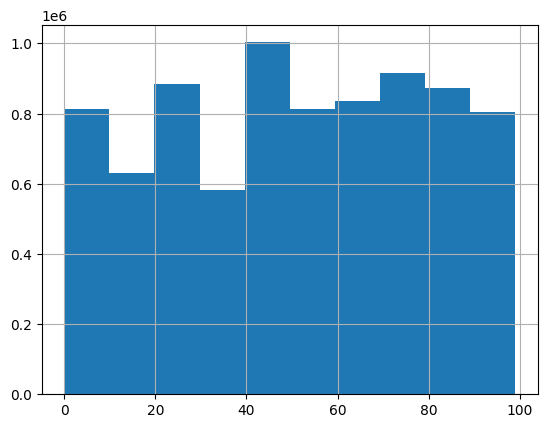

In [21]:
dd['Cluster_No'].hist();

## Project - Species

In [30]:
def get_plant_features():
    df = pd.read_csv("/Users/davidschildberger/code/dadavie/planetary_garden/raw_data/data_clean_5_continent_Animal_plants.csv", on_bad_lines='skip',  index_col=0)
    return df

In [31]:
df_plant_info = get_plant_features()

In [32]:
df_plant_info = df_plant_info[(df_plant_info['year']>=1901) & (df_plant_info['year']<=2021)]
df_plant_info.reset_index(inplace=True)
df_plant_info.shape

(271312, 17)

In [33]:
filename = 'plants_bioclim_soil_upd.csv'
path = '/Users/davidschildberger/code/dadavie/planetary_garden/raw_data/'
df = pd.read_csv(path+filename, index_col=0)
df.dropna(inplace=True)

In [34]:
df.shape

(247036, 79)

In [35]:
df_plant_info = pd.merge(df_plant_info, df,  how='right', left_index=True, right_index=True)
df_plant_info.shape

(247036, 96)

In [36]:
df_plant_info.head()

gbifID                            datasetKey   kingdom      phylum  \
0  1807713417  2f676abc-4503-489e-8f0c-fcb6e1bc554b  Animalia  Arthropoda   
1  1807713566  2f676abc-4503-489e-8f0c-fcb6e1bc554b  Animalia  Arthropoda   
2  1807713573  2f676abc-4503-489e-8f0c-fcb6e1bc554b  Animalia  Arthropoda   
3  1807713712  2f676abc-4503-489e-8f0c-fcb6e1bc554b  Animalia  Arthropoda   
4  1807713469  2f676abc-4503-489e-8f0c-fcb6e1bc554b  Animalia  Arthropoda   

     class       order         family          genus  \
0  Insecta  Coleoptera  Curculionidae  Andranthobius   
1  Insecta  Coleoptera  Curculionidae  Andranthobius   
2  Insecta  Coleoptera  Curculionidae  Andranthobius   
3  Insecta  Coleoptera  Curculionidae  Andranthobius   
4  Insecta  Coleoptera  Curculionidae  Andranthobius   

                     species             scientificName  ...   sg51   sg52  \
0  Andranthobius setirostris  Andranthobius setirostris  ...  277.0  277.0   
1  Andranthobius setirostris  Andranthobius setirostris  ...  277.0  277.0   
2  Andranthobius setirostris  Andranthobius setirostris  ...  277.0  277.0   
3  Andranthobius setirostris  Andranthobius setirostris  ...  277.0  277.0   
4  Andranthobius setirostris  Andranthobius setirostris  ...  277.0  277.0   

    sg53   sg54   sg55   sg56   sg57   sg58   sg59   sg60  
0  277.0  277.0  277.0  277.0  277.0  277.0  277.0  277.0  
1  277.0  277.0  277.0  277.0  277.0  277.0  277.0  277.0  
2  277.0  277.0  277.0  277.0  277.0  277.0  277.0  277.0  
3  277.0  277.0  277.0  277.0  277.0  277.0  277.0  277.0  
4  277.0  277.0  277.0  277.0  277.0  277.0  277.0  277.0  

[5 rows x 96 columns]

In [185]:
#df.iloc[:,19:].describe()

b1             b2             b3             b4  \
count  263512.000000  263512.000000  263512.000000  263512.000000   
mean       20.468534      10.703246       0.629994       2.616164   
std         6.383115       2.862269       0.176651       2.660340   
min       -31.441666       3.200000       0.130000       0.130000   
25%        17.216669       8.370000       0.500000       0.650000   
50%        22.450001      10.283333       0.660000       1.390000   
75%        25.383333      12.670000       0.770000       3.840000   
max        31.175000      21.900000       1.070000      20.879999   

                  b5             b6             b7             b8  \
count  263512.000000  263512.000000  263512.000000  263512.000000   
mean       29.895701      10.953061      18.998201      20.844245   
std         4.394666      10.129369       9.039937       7.362849   
min        -8.700000     -53.200001       6.500000     -45.200001   
25%        28.100000       4.800000      12.100000      18.629999   
50%        30.799999      14.200000      16.000000      23.799999   
75%        32.400002      19.000000      23.900000      25.900000   
max        46.099998      25.400000      69.900002      35.330002   

                  b9            b10            b11            b12  \
count  263512.000000  263512.000000  263512.000000  263512.000000   
mean       20.252815      23.369849      17.696032    1647.339914   
std         6.865619       4.697796       8.833700    1028.063266   
min       -39.669998     -19.200001     -45.200001       0.000000   
25%        17.330000      21.100000      13.230000     844.099976   
50%        22.070000      24.830000      20.570000    1464.900024   
75%        25.200001      26.629999      24.430000    2353.600098   
max        37.570000      37.570000      29.600000    8666.700195   

                 b13            b14            b15            b16  \
count  263512.000000  263512.000000  263506.000000  263512.000000   
mean      274.121942      42.702105      72.270086     624.923322   
std       168.355885      55.743550      32.947314     374.603005   
min         0.000000       0.000000       6.280000       0.000000   
25%       147.899994       3.700000      49.040001     324.000000   
50%       251.600006      22.975000      66.389999     579.700012   
75%       370.700012      58.500000      92.209999     891.299988   
max      2210.600098    1398.699951     321.929993    3994.699951   

                 b17            b18            b19  
count  263512.000000  263512.000000  263512.000000  
mean      212.601457     440.542683     294.468516  
std       211.705486     307.807033     305.810845  
min         0.000000       0.000000       0.000000  
25%        51.700001     203.000000      80.599998  
50%       156.000000     390.899994     183.800003  
75%       304.700012     624.099976     402.200012  
max      2447.500000    3721.399902    3204.300049

In [8]:
samples = df.sample(n = 5)

In [10]:
sel_pred_sc = scaler.transform(samples.values)
kmeans.predict(sel_pred_sc)

array([182, 418, 311,  47, 429], dtype=int32)

In [20]:
dd_sel = dd[dd['Cluster_No']==429]
dd_sel

0      1      2          3          4     5     6          7  \
49653      0.0  155.0  607.0  28.008333   7.675001  0.70  1.06  34.099998   
50633      0.0  161.0  218.0  21.325003   9.883334  0.82  0.77  27.500000   
51630      0.0  166.0  235.0  25.233335   9.783334  0.84  0.64  31.600000   
51842      0.0  167.0  354.0  26.599998   9.216666  0.68  1.03  33.799999   
51845      0.0  167.0  357.0  26.425001   9.108333  0.67  0.95  33.599998   
...        ...    ...    ...        ...        ...   ...   ...        ...   
8153039  120.0  230.0  452.0  23.379999   7.960000  0.55  2.38  30.900000   
8154452  120.0  239.0  253.0  20.139999  10.680000  0.48  3.91  30.799999   
8154603  120.0  240.0  254.0  19.980000  10.070000  0.47  3.94  30.400000   
8156575  120.0  265.0  652.0   9.530000   8.510000  0.51  2.79  19.200001   
8156608  120.0  266.0  652.0  10.620000   7.640000  0.52  2.43  19.200001   

                 8          9  ...     73     74     75     76     77     78  \
49653    22.400000  11.000000  ...  308.0  308.0  308.0  308.0  308.0  308.0   
50633    14.700000  12.000000  ...  274.0  274.0  274.0  274.0  274.0  274.0   
51630    19.500000  11.600000  ...  292.0  292.0  292.0  292.0  292.0  292.0   
51842    20.700001  13.500000  ...  284.0  284.0  284.0  284.0  284.0  284.0   
51845    20.799999  13.600000  ...  281.0  281.0  281.0  281.0  281.0  281.0   
...            ...        ...  ...    ...    ...    ...    ...    ...    ...   
8153039  16.100000  14.600000  ...  278.0  278.0  278.0  278.0  278.0  278.0   
8154452   8.500000  22.299999  ...  300.0  300.0  300.0  300.0  300.0  300.0   
8154603   8.700000  21.600000  ...  281.0  281.0  281.0  281.0  281.0  281.0   
8156575   2.400000  16.600000  ...  284.0  284.0  284.0  284.0  284.0  284.0   
8156608   4.200000  14.800000  ...  289.0  289.0  289.0  289.0  289.0  289.0   

            79     80     81  Cluster_No  
49653    308.0  308.0  308.0         429  
50633    274.0  274.0  274.0         429  
51630    292.0  292.0  292.0         429  
51842    284.0  284.0  284.0         429  
51845    281.0  281.0  281.0         429  
...        ...    ...    ...         ...  
8153039  278.0  278.0  278.0         429  
8154452  300.0  300.0  300.0         429  
8154603  281.0  281.0  281.0         429  
8156575  284.0  284.0  284.0         429  
8156608  289.0  289.0  289.0         429  

[14336 rows x 83 columns]

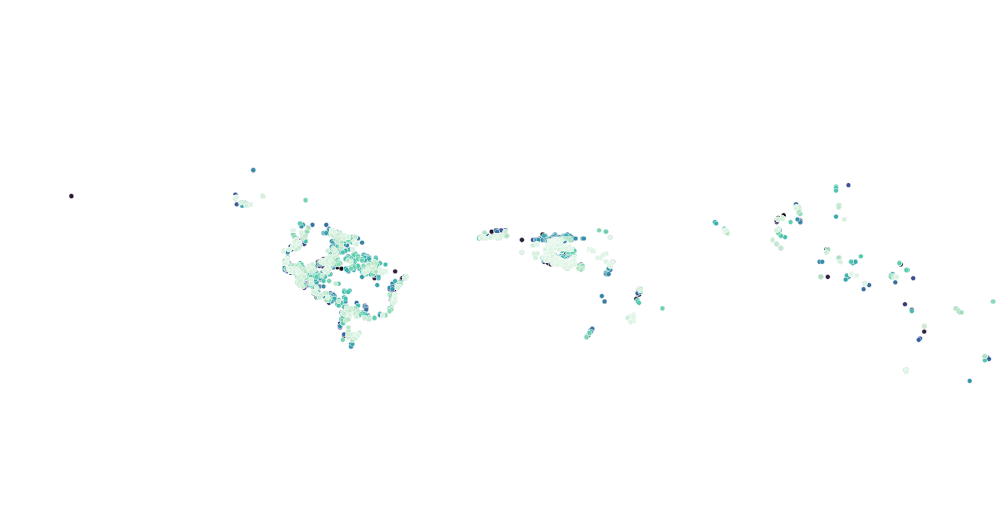

In [21]:
plt.figure(figsize=(16, 8), dpi=80)
g = seaborn.scatterplot(data=dd_sel,  x=2, y=1, hue=0, legend=False, palette="mako", size=0.01)
g.axis(xmin=0,xmax=720)
g.axis(ymin=0,ymax=360)
g.invert_yaxis()

# Hide the right and top spines
g.spines.right.set_visible(False)
g.spines.top.set_visible(False)
g.spines.left.set_visible(False)
g.spines.bottom.set_visible(False)
g.set(xlabel=None)
g.set(ylabel=None)
g.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.show()

## Get clusters for all species

In [39]:
sel_pred_sc = scaler.transform(df.values)
pred_cl = kmeans.predict(sel_pred_sc)
pred_cl

array([ 68,  68,  68, ..., 114, 261, 417], dtype=int32)

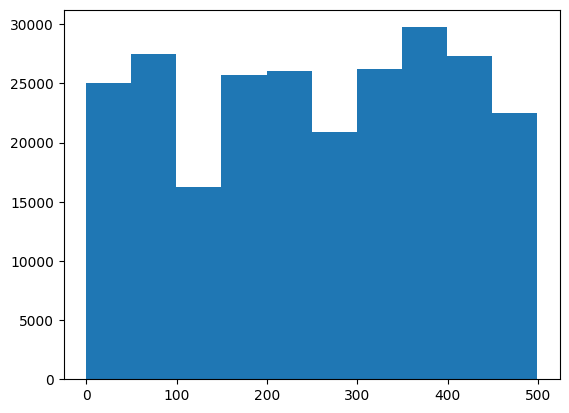

In [40]:
plt.hist(pred_cl);

In [41]:
df_plant_info['Cluster'] = pred_cl

In [42]:
df_plant_info

gbifID                            datasetKey   kingdom  \
0       1807713417  2f676abc-4503-489e-8f0c-fcb6e1bc554b  Animalia   
1       1807713566  2f676abc-4503-489e-8f0c-fcb6e1bc554b  Animalia   
2       1807713573  2f676abc-4503-489e-8f0c-fcb6e1bc554b  Animalia   
3       1807713712  2f676abc-4503-489e-8f0c-fcb6e1bc554b  Animalia   
4       1807713469  2f676abc-4503-489e-8f0c-fcb6e1bc554b  Animalia   
...            ...                                   ...       ...   
271307  2517674886  15f819bd-6612-4447-854b-14d12ee1022d   Plantae   
271308  2517674991  15f819bd-6612-4447-854b-14d12ee1022d   Plantae   
271309  2514143911  15f819bd-6612-4447-854b-14d12ee1022d   Plantae   
271310  3400980322  15f819bd-6612-4447-854b-14d12ee1022d   Plantae   
271311  2513448510  15f819bd-6612-4447-854b-14d12ee1022d   Plantae   

              phylum          class       order          family  \
0         Arthropoda        Insecta  Coleoptera   Curculionidae   
1         Arthropoda        Insecta  Coleoptera   Curculionidae   
2         Arthropoda        Insecta  Coleoptera   Curculionidae   
3         Arthropoda        Insecta  Coleoptera   Curculionidae   
4         Arthropoda        Insecta  Coleoptera   Curculionidae   
...              ...            ...         ...             ...   
271307  Tracheophyta     Liliopsida      Poales      Cyperaceae   
271308  Tracheophyta  Magnoliopsida   Solanales  Convolvulaceae   
271309  Tracheophyta  Magnoliopsida     Rosales        Rosaceae   
271310  Tracheophyta     Liliopsida      Poales         Poaceae   
271311  Tracheophyta  Magnoliopsida  Sapindales     Sapindaceae   

                genus                     species  \
0       Andranthobius   Andranthobius setirostris   
1       Andranthobius   Andranthobius setirostris   
2       Andranthobius   Andranthobius setirostris   
3       Andranthobius   Andranthobius setirostris   
4       Andranthobius   Andranthobius setirostris   
...               ...                         ...   
271307        Cyperus      Cyperus inselbergensis   
271308    Neuropeltis  Neuropeltis pseudovelutina   
271309          Rubus             Rubus bellardii   
271310       Aristida         Aristida leucophaea   
271311      Nephelium      Nephelium melanomiscum   

                                      scientificName  ...   sg52   sg53  \
0                          Andranthobius setirostris  ...  277.0  277.0   
1                          Andranthobius setirostris  ...  277.0  277.0   
2                          Andranthobius setirostris  ...  277.0  277.0   
3                          Andranthobius setirostris  ...  277.0  277.0   
4                          Andranthobius setirostris  ...  277.0  277.0   
...                                              ...  ...    ...    ...   
271307                    Cyperus inselbergensis Lye  ...  526.0  526.0   
271308  Neuropeltis pseudovelutina Lejoly & Lisowski  ...  430.0  430.0   
271309                     Rubus pedemontanus Pinkw.  ...  256.0  256.0   
271310                   Aristida leucophaea Henrard  ...  179.0  179.0   
271311                 Nephelium melanomiscum Radlk.  ...  397.0  397.0   

         sg54   sg55   sg56   sg57   sg58   sg59   sg60  Cluster  
0       277.0  277.0  277.0  277.0  277.0  277.0  277.0       68  
1       277.0  277.0  277.0  277.0  277.0  277.0  277.0       68  
2       277.0  277.0  277.0  277.0  277.0  277.0  277.0       68  
3       277.0  277.0  277.0  277.0  277.0  277.0  277.0       68  
4       277.0  277.0  277.0  277.0  277.0  277.0  277.0       68  
...       ...    ...    ...    ...    ...    ...    ...      ...  
271307  526.0  526.0  526.0  526.0  526.0  526.0  526.0      218  
271308  430.0  430.0  430.0  430.0  430.0  430.0  430.0      401  
271309  256.0  256.0  256.0  256.0  256.0  256.0  256.0      114  
271310  179.0  179.0  179.0  179.0  179.0  179.0  179.0      261  
271311  397.0  397.0  397.0  397.0  397.0  397.0  397.0      417  

[247036 rows x 97 colum

In [43]:
df_spec = df_plant_info.groupby('species')['Cluster'].apply(lambda x: list(x.unique())).reset_index()
df_spec

species    Cluster
0                      Aa lozanoi  [454, 62]
1                      Aa maderoi      [367]
2              Aakia tuerckheimii      [323]
3      Aapticheilichthys websteri      [203]
4                Aaptosyax grypus  [82, 174]
...                           ...        ...
93155      Zygostrophus urallanus      [315]
93156            Zyras insperatus      [491]
93157                Zyras jansei      [155]
93158              Zyzyura mayana      [393]
93159        Zyzzyzus rubusidaeus      [225]

[93160 rows x 2 columns]

## Project - climate

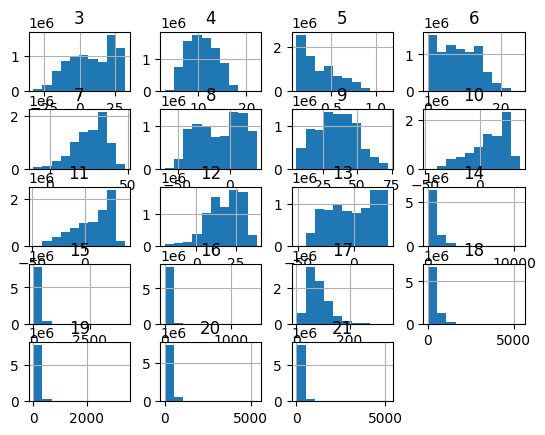

In [183]:
## distribution features historical data
sel_data.hist();

In [22]:
path = '/Users/davidschildberger/code/dadavie/planetary_garden/raw_data/'
filename = 'future_clim_soilgr.npy'
cl_fut = np.load(path+filename, allow_pickle=True)

In [23]:
pr_df = pd.DataFrame(cl_fut[0])
pr_df = pr_df.astype(float)
pr_df.describe()

0             1             2             3             4   \
count  60137.000000  60137.000000  60137.000000  60137.000000  60137.000000   
mean     113.453481    395.507907     10.673870     11.174756     38.559810   
std       63.790355    168.742113     14.273984      3.034159     19.624384   
min       12.000000      0.000000    -25.200000      0.200000      2.100000   
25%       60.000000    238.000000     -0.700000      8.900000     22.600000   
50%       99.000000    414.000000     11.100000     11.300000     32.800000   
75%      159.000000    540.000000     24.600000     13.500000     51.700000   
max      289.000000    719.000000     32.500000     20.800000     94.100000   

                 5             6             7             8             9   \
count  60137.000000  60137.000000  60137.000000  60137.000000  60137.000000   
mean     848.207117     28.361225     -6.158131     34.519356     18.016411   
std      509.712124     10.477409     18.815348     13.323580     10.848456   
min       13.400000     -7.300000    -46.900000      4.100000    -36.500000   
25%      424.600000     23.000000    -22.800000     24.800000     12.400000   
50%      851.400000     29.900000     -4.800000     34.000000     19.600000   
75%     1264.400000     35.400000     10.500000     44.900000     26.200000   
max     2330.200000     50.300000     25.000000     72.000000     39.900000   

       ...            71            72            73            74  \
count  ...  60137.000000  60137.000000  60137.000000  60137.000000   
mean   ...    210.770391    210.770391    210.770391    210.770391   
std    ...    103.173095    103.173095    103.173095    103.173095   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...    166.000000    166.000000    166.000000    166.000000   
50%    ...    219.000000    219.000000    219.000000    219.000000   
75%    ...    274.000000    274.000000    274.000000    274.000000   
max    ...    659.000000    659.000000    659.000000    659.000000   

                 75            76            77            78            79  \
count  60137.000000  60137.000000  60137.000000  60137.000000  60137.000000   
mean     210.770391    210.770391    210.770391    210.770391    210.770391   
std      103.173095    103.173095    103.173095    103.173095    103.173095   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      166.000000    166.000000    166.000000    166.000000    166.000000   
50%      219.000000    219.000000    219.000000    219.000000    219.000000   
75%      274.000000    274.000000    274.000000    274.000000    274.000000   
max      659.000000    659.000000    659.000000    659.000000    659.000000   

                 80  
count  60137.000000  
mean     210.770391  
std      103.173095  
min        0.000000  
25%      166.000000  
50%      219.000000  
75%      274.000000  
max      659.000000  

[8 rows x 81 columns]

In [24]:
pr_df = pd.DataFrame(cl_fut[15])
pr_df = pr_df.astype(float)
pr_df.describe()

0             1             2             3             4   \
count  60137.000000  60137.000000  60137.000000  60137.000000  60137.000000   
mean     113.453481    395.507907     16.368863     11.112501     38.205454   
std       63.790355    168.742113     13.500825      3.152218     19.125707   
min       12.000000      0.000000    -19.700000     -0.800000     -8.500000   
25%       60.000000    238.000000      5.800000      9.000000     22.700000   
50%       99.000000    414.000000     16.200000     11.300000     32.100000   
75%      159.000000    540.000000     29.500000     13.500000     51.100000   
max      289.000000    719.000000     38.000000     20.900000     92.700000   

                 5             6             7             8             9   \
count  60137.000000  60137.000000  60137.000000  60137.000000  60137.000000   
mean     828.717345     34.202070      0.295938     33.905847     22.436157   
std      473.932443     10.738382     17.016252     12.654419     11.152557   
min       18.000000     -3.600000    -38.500000      6.400000    -31.300000   
25%      428.100000     29.400000    -14.200000     24.500000     15.500000   
50%      863.900000     36.100000     -0.100000     33.400000     24.700000   
75%     1196.400000     41.400000     15.500000     43.300000     31.100000   
max     2229.000000     56.000000     30.300000     69.600000     45.900000   

       ...            71            72            73            74  \
count  ...  60137.000000  60137.000000  60137.000000  60137.000000   
mean   ...    210.770391    210.770391    210.770391    210.770391   
std    ...    103.173095    103.173095    103.173095    103.173095   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...    166.000000    166.000000    166.000000    166.000000   
50%    ...    219.000000    219.000000    219.000000    219.000000   
75%    ...    274.000000    274.000000    274.000000    274.000000   
max    ...    659.000000    659.000000    659.000000    659.000000   

                 75            76            77            78            79  \
count  60137.000000  60137.000000  60137.000000  60137.000000  60137.000000   
mean     210.770391    210.770391    210.770391    210.770391    210.770391   
std      103.173095    103.173095    103.173095    103.173095    103.173095   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      166.000000    166.000000    166.000000    166.000000    166.000000   
50%      219.000000    219.000000    219.000000    219.000000    219.000000   
75%      274.000000    274.000000    274.000000    274.000000    274.000000   
max      659.000000    659.000000    659.000000    659.000000    659.000000   

                 80  
count  60137.000000  
mean     210.770391  
std      103.173095  
min        0.000000  
25%      166.000000  
50%      219.000000  
75%      274.000000  
max      659.000000  

[8 rows x 81 columns]

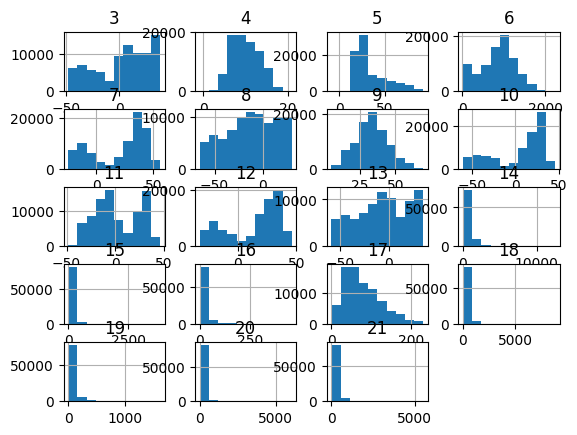

In [199]:
## distribution features future climate predictions
pr_df.iloc[:, 3:].hist();

In [37]:
pr_sel = pr_df.sample(n = 5)
pr_sel

0      1     2     3     4      5     6     7     8     9   ...  \
51809  200.0  419.0  28.1  12.7  62.6  159.4  38.2  17.8  20.3  28.0  ...   
14802   60.0   57.0  10.1   6.8  31.5  588.2  22.8   1.1  21.7   4.7  ...   
52558  206.0  232.0  34.3  12.2  61.5  180.8  44.6  24.7  19.9  34.1  ...   
55301  222.0  453.0  26.2  12.0  60.2  273.8  35.8  15.9  19.9  28.8  ...   
56116  227.0  252.0  27.8  12.8  60.5  302.1  37.9  16.8  21.1  29.6  ...   

          71     72     73     74     75     76     77     78     79     80  
51809  223.0  223.0  223.0  223.0  223.0  223.0  223.0  223.0  223.0  223.0  
14802   65.0   65.0   65.0   65.0   65.0   65.0   65.0   65.0   65.0   65.0  
52558  206.0  206.0  206.0  206.0  206.0  206.0  206.0  206.0  206.0  206.0  
55301  287.0  287.0  287.0  287.0  287.0  287.0  287.0  287.0  287.0  287.0  
56116  355.0  355.0  355.0  355.0  355.0  355.0  355.0  355.0  355.0  355.0  

[5 rows x 81 columns]

In [38]:
fcl_sam = pr_sel.iloc[:,2:]

In [39]:
sel_pred_cl = scaler.transform(fcl_sam.values)
kmeans.predict(sel_pred_cl)

array([429, 166, 133,  63, 300], dtype=int32)

In [40]:
cl_sel = dd[dd['Cluster_No']==300]

In [41]:
cl_sel.describe()

0             1             2             3             4  \
count  15614.000000  15614.000000  15614.000000  15614.000000  15614.000000   
mean      56.069233    182.130076    509.063405     25.237377      9.540754   
std       35.177303     13.672377    167.564360      2.281837      1.858523   
min        0.000000     89.000000     15.000000     10.158334      5.160000   
25%       25.000000    176.000000    459.000000     24.516665      8.349999   
50%       54.000000    183.000000    590.000000     25.916666      9.216666   
75%       86.000000    188.000000    616.000000     26.629999     10.338333   
max      120.000000    262.000000    719.000000     29.059999     17.620001   

                  5             6             7             8             9  \
count  15614.000000  15614.000000  15614.000000  15614.000000  15614.000000   
mean       0.814803      0.566531     31.160971     19.510811     11.826073   
std        0.084088      0.680713      1.704907      3.375503      2.644981   
min        0.220000      0.130000     17.700001     -4.000000      7.200000   
25%        0.780000      0.340000     30.500000     18.600000     10.300000   
50%        0.830000      0.420000     31.500000     20.500000     11.400000   
75%        0.870000      0.570000     32.200001     21.600000     12.600000   
max        1.080000      9.300000     35.400002     24.500000     37.000000   

       ...            73            74            75            76  \
count  ...  15614.000000  15614.000000  15614.000000  15614.000000   
mean   ...    363.093442    363.093442    363.093442    363.093442   
std    ...     16.797483     16.797483     16.797483     16.797483   
min    ...    325.000000    325.000000    325.000000    325.000000   
25%    ...    350.000000    350.000000    350.000000    350.000000   
50%    ...    363.000000    363.000000    363.000000    363.000000   
75%    ...    377.000000    377.000000    377.000000    377.000000   
max    ...    405.000000    405.000000    405.000000    405.000000   

                 77            78            79            80            81  \
count  15614.000000  15614.000000  15614.000000  15614.000000  15614.000000   
mean     363.093442    363.093442    363.093442    363.093442    363.093442   
std       16.797483     16.797483     16.797483     16.797483     16.797483   
min      325.000000    325.000000    325.000000    325.000000    325.000000   
25%      350.000000    350.000000    350.000000    350.000000    350.000000   
50%      363.000000    363.000000    363.000000    363.000000    363.000000   
75%      377.000000    377.000000    377.000000    377.000000    377.000000   
max      405.000000    405.000000    405.000000    405.000000    405.000000   

       Cluster_No  
count     15614.0  
mean        300.0  
std           0.0  
min         300.0  
25%         300.0  
50%         300.0  
75%         300.0  
max         300.0  

[8 rows x 83 columns]

/var/folders/jj/6lhmrlt15xs297nzzcs7734w0000gn/T/ipykernel_9107/775013716.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = seaborn.scatterplot(data=cl_sel,  x=2, y=1,legend=False, palette="mako", size=0.01)


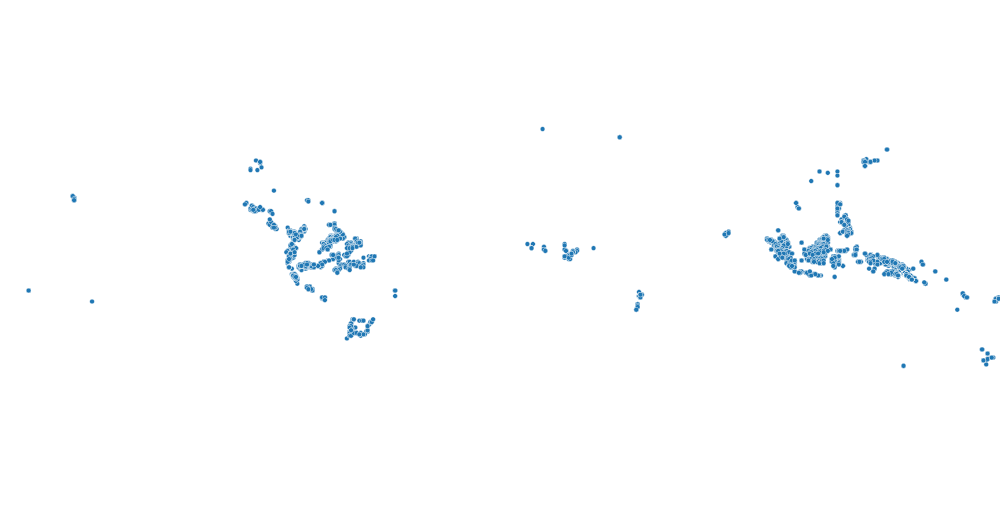

In [42]:
plt.figure(figsize=(16, 8), dpi=80)
g = seaborn.scatterplot(data=cl_sel,  x=2, y=1,legend=False, palette="mako", size=0.01)
g.axis(xmin=0,xmax=720)
g.axis(ymin=0,ymax=360)
g.invert_yaxis()

# Hide the right and top spines
g.spines.right.set_visible(False)
g.spines.top.set_visible(False)
g.spines.left.set_visible(False)
g.spines.bottom.set_visible(False)
g.set(xlabel=None)
g.set(ylabel=None)
g.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.show()

# Bounding Box - Selection of Plants - History + Today

In [47]:
df_plant_info.head()

gbifID                            datasetKey   kingdom      phylum  \
0  1807713417  2f676abc-4503-489e-8f0c-fcb6e1bc554b  Animalia  Arthropoda   
1  1807713566  2f676abc-4503-489e-8f0c-fcb6e1bc554b  Animalia  Arthropoda   
2  1807713573  2f676abc-4503-489e-8f0c-fcb6e1bc554b  Animalia  Arthropoda   
3  1807713712  2f676abc-4503-489e-8f0c-fcb6e1bc554b  Animalia  Arthropoda   
4  1807713469  2f676abc-4503-489e-8f0c-fcb6e1bc554b  Animalia  Arthropoda   

     class       order         family          genus  \
0  Insecta  Coleoptera  Curculionidae  Andranthobius   
1  Insecta  Coleoptera  Curculionidae  Andranthobius   
2  Insecta  Coleoptera  Curculionidae  Andranthobius   
3  Insecta  Coleoptera  Curculionidae  Andranthobius   
4  Insecta  Coleoptera  Curculionidae  Andranthobius   

                     species             scientificName  \
0  Andranthobius setirostris  Andranthobius setirostris   
1  Andranthobius setirostris  Andranthobius setirostris   
2  Andranthobius setirostris  Andranthobius setirostris   
3  Andranthobius setirostris  Andranthobius setirostris   
4  Andranthobius setirostris  Andranthobius setirostris   

      verbatimScientificName countryCode          locality stateProvince  \
0  Andranthobius setirostris          BR  Canaã do Carajás          Pará   
1  Andranthobius setirostris          BR  Canaã do Carajás          Pará   
2  Andranthobius setirostris          BR  Canaã do Carajás          Pará   
3  Andranthobius setirostris          BR  Canaã do Carajás          Pará   
4  Andranthobius setirostris          BR  Canaã do Carajás          Pará   

   decimalLatitude  decimalLongitude  year  
0        -6.475556        -49.874167  2005  
1        -6.475556        -49.874167  2005  
2        -6.475556        -49.874167  2005  
3        -6.475556        -49.874167  2005  
4        -6.475556        -49.874167  2005

In [48]:
df_plant_info['c_lat'] = df_plant_info['decimalLatitude'].apply(lambda x: int(round(np.interp(x, [-90, 90], [0, 360]))))
df_plant_info['c_lon']= df_plant_info['decimalLongitude'].apply(lambda x: int(round(np.interp(x, [-180, 180], [0, 720]))))

In [49]:
lat = 48.210033
lon = 16.363449

In [50]:
c_lat = int(round(np.interp(lat, [-90, 90], [0, 360])))  # check order of values here
c_lon = int(round(np.interp(lon, [-180, 180], [0, 720])))

In [53]:
df_plant_info[(df_plant_info['c_lat']==c_lat)&(df_plant_info['c_lon']==c_lon)]

gbifID                            datasetKey   kingdom  \
19997   1270028421  7e380070-f762-11e1-a439-00145eb45e9a  Animalia   
33094   1270028299  7e380070-f762-11e1-a439-00145eb45e9a  Animalia   
33591   1270028436  7e380070-f762-11e1-a439-00145eb45e9a  Animalia   
36162   1270028439  7e380070-f762-11e1-a439-00145eb45e9a  Animalia   
50686   1270028335  7e380070-f762-11e1-a439-00145eb45e9a  Animalia   
50869   1270028402  7e380070-f762-11e1-a439-00145eb45e9a  Animalia   
51239   1270028371  7e380070-f762-11e1-a439-00145eb45e9a  Animalia   
51778   1270028416  7e380070-f762-11e1-a439-00145eb45e9a  Animalia   
52011   1270028319  7e380070-f762-11e1-a439-00145eb45e9a  Animalia   
82012   1270028295  7e380070-f762-11e1-a439-00145eb45e9a  Animalia   
93197   1270028344  7e380070-f762-11e1-a439-00145eb45e9a  Animalia   
119790  1270028407  7e380070-f762-11e1-a439-00145eb45e9a  Animalia   
120034  1270028404  7e380070-f762-11e1-a439-00145eb45e9a  Animalia   
120400  1270028397  7e380070-f762-11e1-a439-00145eb45e9a  Animalia   
120698  1270028428  7e380070-f762-11e1-a439-00145eb45e9a  Animalia   
129580  1270028272  7e380070-f762-11e1-a439-00145eb45e9a  Animalia   
145675  1270028399  7e380070-f762-11e1-a439-00145eb45e9a  Animalia   
172994  3043018674  f8f35535-8c10-43fc-89dc-eb0843f25394   Plantae   
173496  1270028395  7e380070-f762-11e1-a439-00145eb45e9a  Animalia   
173714  1270028347  7e380070-f762-11e1-a439-00145eb45e9a  Animalia   
223986  1270028349  7e380070-f762-11e1-a439-00145eb45e9a  Animalia   
224124  1270024603  7e380070-f762-11e1-a439-00145eb45e9a  Animalia   
224401  1270028358  7e380070-f762-11e1-a439-00145eb45e9a  Animalia   
224766  1270028331  7e380070-f762-11e1-a439-00145eb45e9a  Animalia   
224962  1270028341  7e380070-f762-11e1-a439-00145eb45e9a  Animalia   
257377  1270028377  7e380070-f762-11e1-a439-00145eb45e9a  Animalia   
262931  1270028406  7e380070-f762-11e1-a439-00145eb45e9a  Animalia   
263456  1270028413  7e380070-f762-11e1-a439-00145eb45e9a  Animalia   
264213  1270028343  7e380070-f762-11e1-a439-00145eb45e9a  Animalia   

              phylum       class    order       family         genus  \
19997     Arthropoda     Insecta  Diptera  Tephritidae  Chaetorellia   
33094     Arthropoda     Insecta  Diptera  Tephritidae  Chaetorellia   
33591     Arthropoda     Insecta  Diptera  Tephritidae  Chaetorellia   
36162     Arthropoda     Insecta  Diptera  Tephritidae  Chaetorellia   
50686     Arthropoda     Insecta  Diptera  Tephritidae  Chaetorellia   
50869     Arthropoda     Insecta  Diptera  Tephritidae  Chaetorellia   
51239     Arthropoda     Insecta  Diptera  Tephritidae  Chaetorellia   
51778     Arthropoda     Insecta  Diptera  Tephritidae  Chaetorellia   
52011     Arthropoda     Insecta  Diptera  Tephritidae  Chaetorellia   
82012     Arthropoda     Insecta  Diptera  Tephritidae  Chaetorellia   
93197     Arthropoda     Insecta  Diptera  Tephritidae  Chaetorellia   
119790    Arthropoda     Insecta  Diptera  Tephritidae  Chaetorellia   
120034    Arthropoda     Insecta  Diptera  Tephritidae  Chaetorellia   
120400    Arthropoda     Insecta  Diptera  Tephritidae  Chaetorellia   
120698    Arthropoda     Insecta  Diptera  Tephritidae  Chaetorellia   
129580    Arthropoda     Insecta  Diptera  Tephritidae  Chaetorellia   
145675    Arthropoda     Insecta  Diptera  Tephritidae  Chaetorellia   
172994  Tracheophyta  Liliopsida   Poales      Poaceae           Poa   
173496    Arthropoda     Insecta  Diptera  Tephritidae  Chaetorellia   
173714    Arthropoda     Insecta  Diptera  Tephritidae  Chaetorellia   
223986    Arthropoda     Insecta  Diptera  Tephritidae  Chaetorellia   
224124    Arthropoda     Insecta  Diptera  Agromyzidae     Phytomyza   
224401    Arthropoda     Insecta  Diptera  Tephritidae  Chaetorellia   
224766    Arthropoda     Insecta  Diptera  Tephritidae  Chaetorellia   
224962    Arthropoda     Insecta  Diptera  Tephritidae  Chaetorellia   
257377    Arthropoda     Insecta  Dipte

# Bounding box - future climate - return Plants

In [5]:
file_fut = 'future_clim_soilgr.npy'
cl_fut = np.load(path+file_fut, allow_pickle=True)

In [6]:
dict_scen = {'ssp126' : 1,
              'sp245' : 2,
              'ssp370' : 3,
              'ssp585' : 4,
             }

In [7]:
dict_time = {'2021-2040' : 1,
             '2041-2060' : 2,
             '2061-2080' : 3,
             '2081-2100' : 4
            }

In [8]:
sel = dict_scen['ssp585']*dict_time['2081-2100']-1

In [9]:
pr_df = pd.DataFrame(cl_fut[sel])
pr_df = pr_df.astype(float)

/var/folders/jj/6lhmrlt15xs297nzzcs7734w0000gn/T/ipykernel_14188/2248776903.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = seaborn.scatterplot(data=pr_df,  x=1, y=0,legend=False, palette="mako", size=0.01)


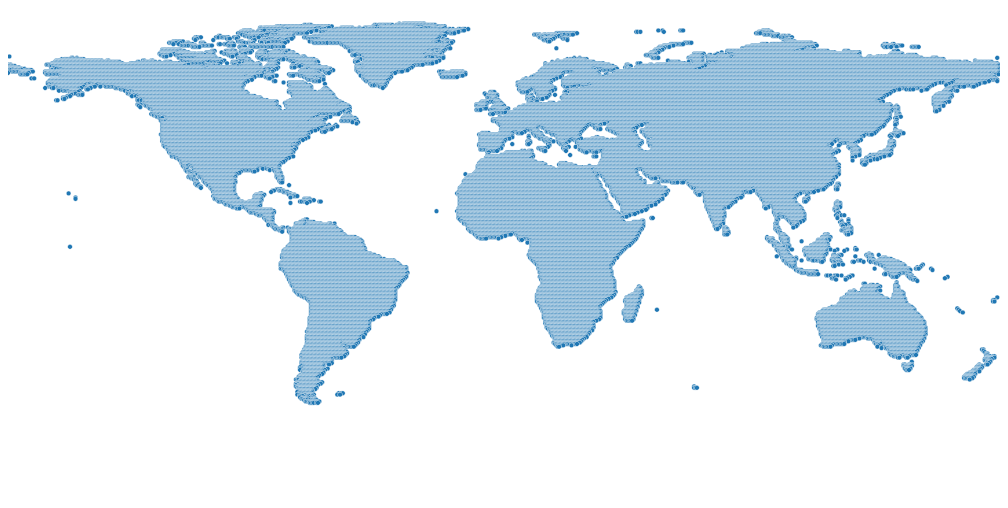

In [10]:
plt.figure(figsize=(16, 8), dpi=80)
g = seaborn.scatterplot(data=pr_df,  x=1, y=0,legend=False, palette="mako", size=0.01)
g.axis(xmin=0,xmax=720)
g.axis(ymin=0,ymax=360)
g.invert_yaxis()

# Hide the right and top spines
g.spines.right.set_visible(False)
g.spines.top.set_visible(False)
g.spines.left.set_visible(False)
g.spines.bottom.set_visible(False)
g.set(xlabel=None)
g.set(ylabel=None)
g.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.show()

In [11]:
lat = 55.00
lon = 37.000

In [12]:
c_lat = int(round(np.interp(lat, [-90, 90], [0, 360])))  # check order of values here
c_lon = int(round(np.interp(lon, [-180, 180], [0, 720])))

In [13]:
c_lat, c_lon

(290, 434)

In [14]:
pr_sel = pr_df[(pr_df[0]==280)&(pr_df[1]==214)]
pr_sel

0      1    2    3     4      5     6    7     8    9   ...   71  \
60048  280.0  214.0  9.7  9.6  49.3  378.2  20.6  1.1  19.5  5.8  ...  0.0   

        72   73   74   75   76   77   78   79   80  
60048  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 81 columns]

In [15]:
fcl_sam = pr_sel.iloc[:,2:]

In [16]:
sel_pred_cl = scaler.transform(fcl_sam.values)
pr_cl = kmeans.predict(sel_pred_cl)
pr_cl

array([166], dtype=int32)

In [26]:
cl_sel = dd[dd['Cluster_No']==pr_cl[0]]

/var/folders/jj/6lhmrlt15xs297nzzcs7734w0000gn/T/ipykernel_14188/2507340929.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = seaborn.scatterplot(data=cl_sel,  x=2, y=1,legend=False, palette="mako", size=0.01)


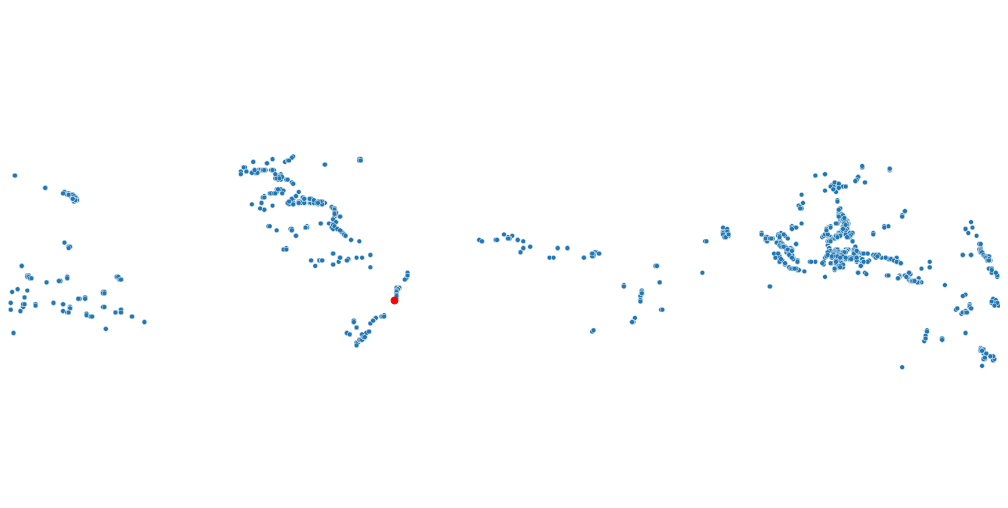

In [66]:
plt.figure(figsize=(16, 8), dpi=80)
g = seaborn.scatterplot(data=cl_sel,  x=2, y=1,legend=False, palette="mako", size=0.01)
g.scatter(x=280, y=214, color='r')
g.axis(xmin=0,xmax=720)
g.axis(ymin=0,ymax=360)
g.invert_yaxis()

# Hide the right and top spines
g.spines.right.set_visible(False)
g.spines.top.set_visible(False)
g.spines.left.set_visible(False)
g.spines.bottom.set_visible(False)
g.set(xlabel=None)
g.set(ylabel=None)
g.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.show()

In [44]:
## returns list of plants that might live there in the future depending on scenario
df_plant_info[df_plant_info['Cluster'] == pr_cl[0]].reset_index()

index      gbifID                            datasetKey   kingdom  \
0       503  1803037641  f2f31bf8-abd3-4bbc-b55e-8fa88c5c8222   Plantae   
1       505  1803041284  f2f31bf8-abd3-4bbc-b55e-8fa88c5c8222   Plantae   
2       510  1803041146  f2f31bf8-abd3-4bbc-b55e-8fa88c5c8222   Plantae   
3       977  1064937941  4bfac3ea-8763-4f4b-a71a-76a6f5f243d3  Animalia   
4      1205   476856944  4bfac3ea-8763-4f4b-a71a-76a6f5f243d3  Animalia   
..      ...         ...                                   ...       ...   
701  270216  2513111543  15f819bd-6612-4447-854b-14d12ee1022d   Plantae   
702  270334  2513105139  15f819bd-6612-4447-854b-14d12ee1022d   Plantae   
703  270511  2513116984  15f819bd-6612-4447-854b-14d12ee1022d   Plantae   
704  270706  2513164357  15f819bd-6612-4447-854b-14d12ee1022d   Plantae   
705  270771  2513210725  15f819bd-6612-4447-854b-14d12ee1022d   Plantae   

           phylum           class          order            family  \
0       Bryophyta       Bryopsida       Hypnales  Sematophyllaceae   
1       Bryophyta       Bryopsida  Fissidentales    Fissidentaceae   
2       Bryophyta       Bryopsida     Dicranales       Dicranaceae   
3      Arthropoda         Insecta     Coleoptera     Staphylinidae   
4        Chordata        Mammalia   Afrosoricida        Tenrecidae   
..            ...             ...            ...               ...   
701  Tracheophyta  Polypodiopsida   Polypodiales  Thelypteridaceae   
702  Tracheophyta   Magnoliopsida   Malpighiales    Phyllanthaceae   
703  Tracheophyta  Lycopodiopsida   Lycopodiales     Lycopodiaceae   
704  Tracheophyta   Magnoliopsida   Malpighiales    Putranjivaceae   
705  Tracheophyta      Liliopsida    Asparagales       Orchidaceae   

                genus                     species  ... sg52 sg53 sg54 sg55  \
0         Aptychopsis       Aptychopsis estrellae  ...  0.0  0.0  0.0  0.0   
1           Fissidens          Fissidens scalaris  ...  0.0  0.0  0.0  0.0   
2          Campylopus         Campylopus sehnemii  ...  0.0  0.0  0.0  0.0   
3          Pinophilus      Pinophilus darlingtoni  ...  0.0  0.0  0.0  0.0   
4           Microgale        Microgale principula  ...  0.0  0.0  0.0  0.0   
..                ...                         ...  ...  ...  ...  ...  ...   
701  Sphaerostephanos  Sphaerostephanos immucosus  ...  0.0  0.0  0.0  0.0   
702         Antidesma          Antidesma jucundum  ...  0.0  0.0  0.0  0.0   
703        Palhinhaea           Palhinhaea cernua  ...  0.0  0.0  0.0  0.0   
704          Drypetes     Drypetes polyalthioides  ...  0.0  0.0  0.0  0.0   
705       Appendicula     Appendicula alatocaulis  ...  0.0  0.0  0.0  0.0   

    sg56  sg57  sg58  sg59  sg60  Cluster  
0    0.0   0.0   0.0   0.0   0.0      166  
1    0.0   0.0   0.0   0.0   0.0      166  
2    0.0   0.0   0.0   0.0   0.0      166  
3    0.0   0.0   0.0   0.0   0.0      166  
4    0.0   0.0   0.0   0.0   0.0      166  
..   ...   ...   ...   ...   ...      ...  
701  0.0   0.0   0.0   0.0   0.0      166  
702  0.0   0.0   0.0   0.0   0.0      166  
703  0.0   0.0   0.0   0.0   0.0      166  
704  0.0   0.0   0.0   0.0   0.0      166  
705  0.0   0.0   0.0   0.0   0.0      166  

[706 rows x 98 columns]

In [62]:
## check overlap with plants today at the same site
df_plant_info[(df_plant_info['c_lat']==280)&(df_plant_info['c_lon']==204)]

gbifID                            datasetKey  kingdom  \
182396  1998959805  861e6afe-f762-11e1-a439-00145eb45e9a  Plantae   

              phylum          class     order        family     genus  \
182396  Tracheophyta  Magnoliopsida  Lamiales  Gesneriaceae  Kohleria   

                       species                               scientificName  \
182396  Kohleria hypertrichosa  Kohleria hypertrichosa J.L.Clark & L.E.Skog   

        ... sg54 sg55 sg56 sg57  sg58  sg59  sg60  Cluster  c_lat  c_lon  
182396  ...  0.0  0.0  0.0  0.0   0.0   0.0   0.0      244    280    204  

[1 rows x 99 columns]

# Show Images selected - load images by id -  not implemented yet

In [365]:
## load images
fold_n_thumb = '/Users/davidschildberger/code/dadavie/planetary_garden/raw_data/thumbnails/'
fi_n = os.listdir(fold_n_thumb)
#fi_n.remove('.DS_Store')

image_list = []
for i in range(10):
    im = Image.open(f"/Users/davidschildberger/code/dadavie/planetary_garden/raw_data/thumbnails/{fi_n[i]}")
    image_list.append(im)

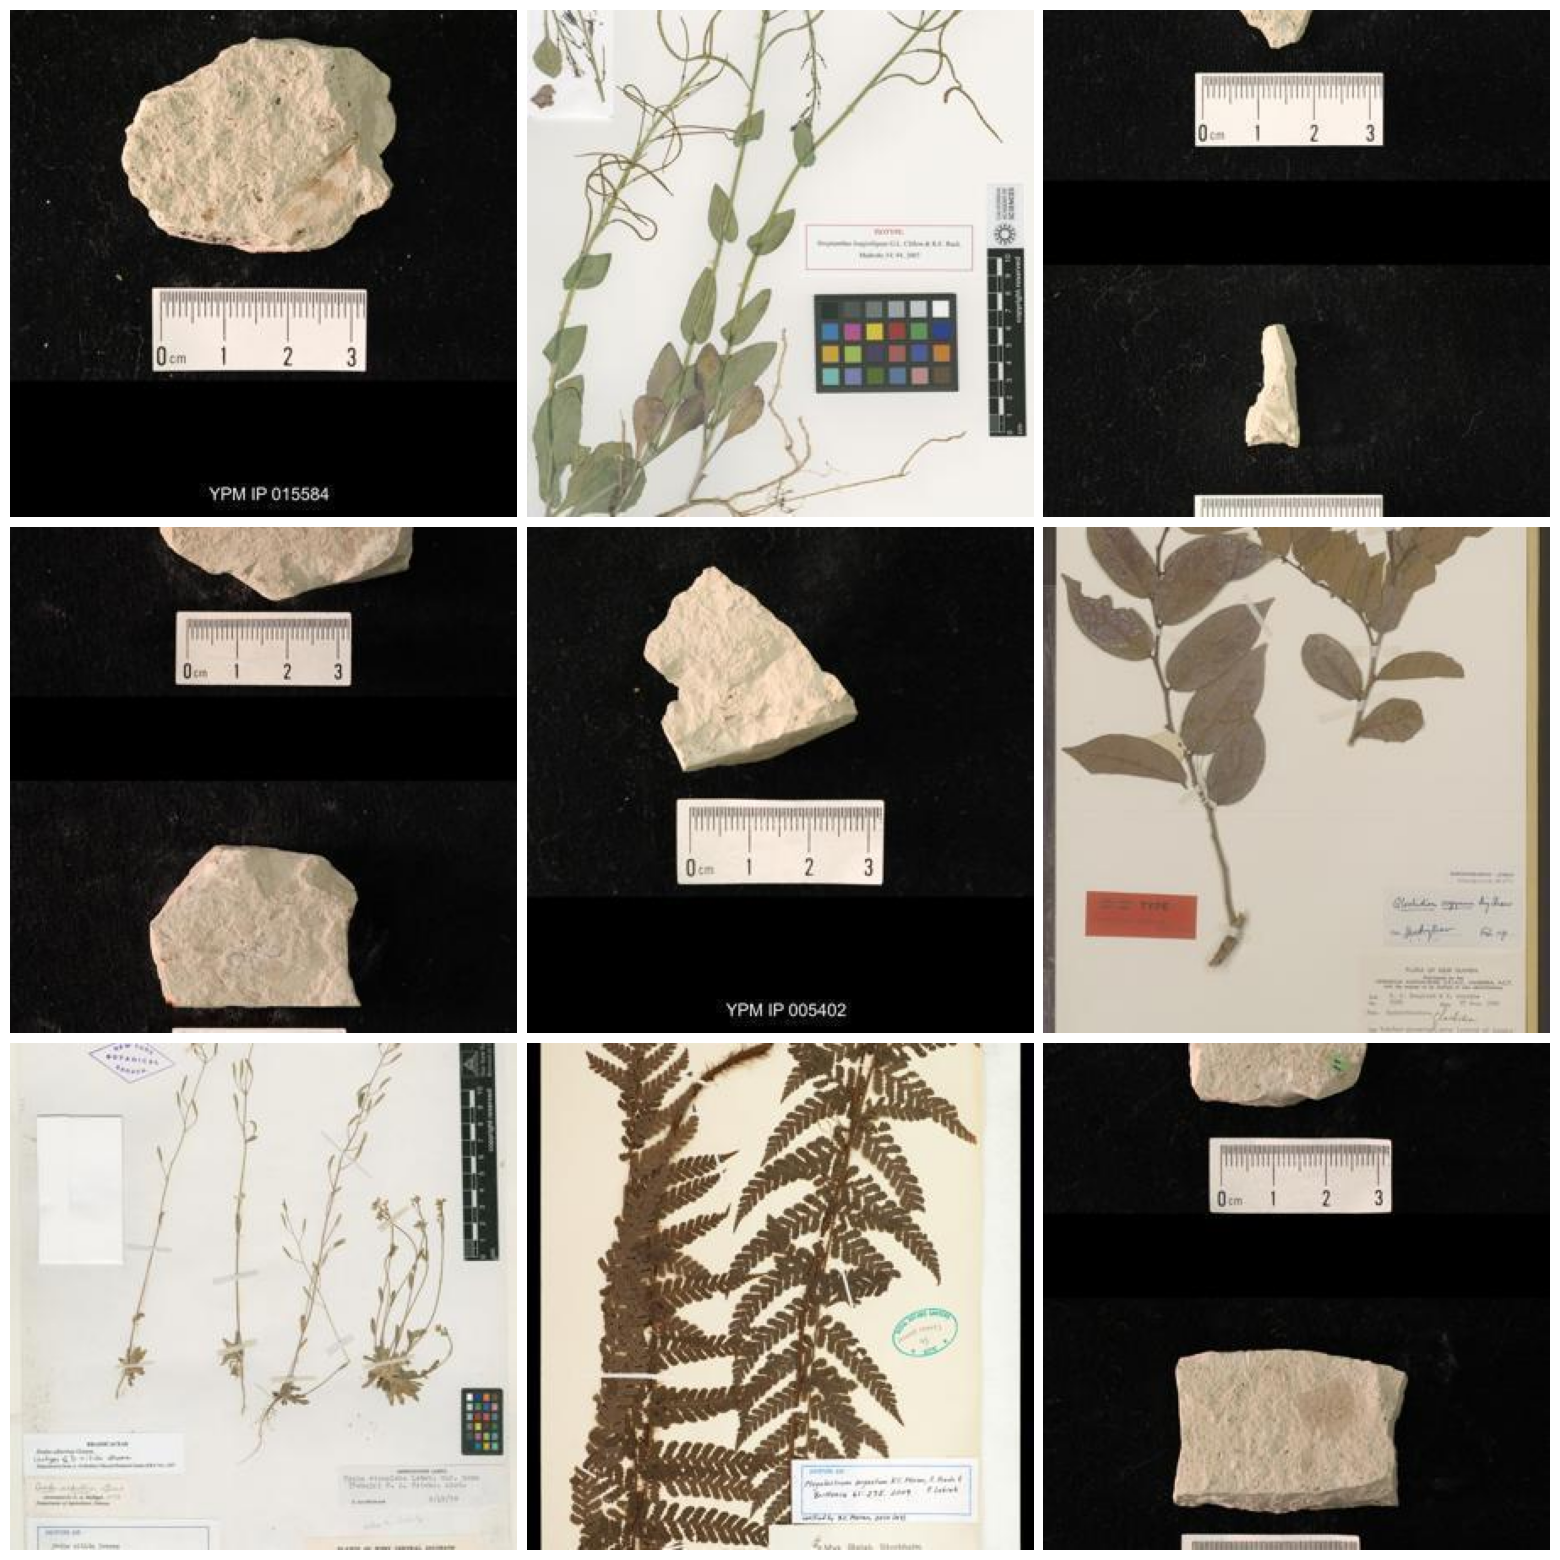

In [374]:
fig = plt.figure(figsize=(20., 20.))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes
                 )

for ax, im in zip(grid, image_list):
    ax.axis("off")
    ax.imshow(im)

plt.show()